<a href="https://colab.research.google.com/github/rishabhshukla061995/Projects/blob/main/Capstone_Project_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name - FedEx Logistics Performance Analysis

##### Project Type    - EDA

## Project Summary

Project Overview:

This project focuses on finding the insigths from FedEx Logistics Dataset.The dataset has details of various ascpects of logistics operations including important information on purchase orders (POs), shipment methods, vendor agreements (INCO terms), delivery schedules, and product-specific details such as item descriptions and dosage forms.By analyzing this data, the project aims to uncover patterns, identify bottlenecks, and provide insights that can improve delivery timelines, reduce costs, and enhance overall operational efficiency.

The project also checks the vendor performance by comparing delivery timelines and fulfillment rates and  helps in identifying reliable vendors and those requiring closer monitoring.

Also, the dosage form and item description fields are assessed to identify any product-specific handling requirements that may influence shipping timelines or costs.

One of the critical goals of this analysis is to detect bottlenecks in the supply chain and recommend actionable solutions. These insights are important in the context of rising global eCommerce demand, where speed and reliability are essential to maintaining a competitive advantage.

Through visualizations and statistical summaries, the EDA provides a comprehensive overview of how various factors interact and contribute to either operational efficiency or delays.

Conclusion:

This project leverages EDA to gain a comprehensive understanding of FedEx Logistics’ operations. By systematically analyzing the dataset, it provides actionable insights that can drive process improvements, enhance operational efficiency, and ultimately contribute to better customer satisfaction and cost savings in a competitive global logistics landscape.








#GitHub Link

#### Github Link: https://github.com/rishabhshukla061995/Projects

## Problem Statement:

1.Delivery performance comparison by managing teams (e.g., PMO - US).: Are shipments managed by specific teams (e.g., PMO – US) more likely to be delivered on time compared to others?

2.Impact of shipment mode (air, sea, etc.) on meeting scheduled delivery dates.: Does the shipment mode (air, sea, etc.) influence in meeting scheduled delivery date? Does the shipment mode impact the frequency of on-time deliveries?

3.Delivery delays by country: Do shipments from certain countries experience more delays compared to others?

4.Frequency of on-time deliveries by shipment mode.:

5.Vendor Lead Time and Delivery Performance :
Is there a difference in delivery performance (on-time vs. delayed) based on the time between the PO Sent to Vendor Date and the Scheduled Delivery Date?

6.Impact of INCO term type on vendor delivery performance.: Does the type of INCO term used impact vendor delivery performance?

7.Relationship between shipment weight and insurance costs.: Are shipments with higher weights more likely to incur higher insurance costs?


# Business Objective

Business Context:

With eCommerce booming and global shipments on the rise, we’re always looking for ways to make our logistics operations smoother and more efficient. By diving into shipment data, we work to spot bottlenecks, keep track of vendor and carrier performance, optimize delivery routes, and minimize delays. Understanding patterns in delivery timelines, shipping methods, and product details helps us make smarter, data-driven decisions. This ensures that we continue to provide our customers with reliable, timely, and cost-effective FedEx services, no matter where their shipments are headed.


# General Guidelines : -

Well-structured, formatted, and commented code is required.

Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

The additional credits will have advantages over other students during Star Student selection.

    [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
              without a single error logged. ]
Each and every logic should have proper comments.

You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.

# Chart visualization code
Why did you pick the specific chart?
What is/are the insight(s) found from the chart?
Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
You have to create at least 20 logical & meaningful charts having important insights.
[ Hints : - Do the Vizualization in a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis ]

# *Let's Begin !*

## *1. Know Your Data*

### Import Libraries



In [1]:
# Importing Data Manipulations and Data Visualization Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importing Datetime and Warnings to handle datetime functions and warnings

import datetime as datetime
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
data=pd.read_csv("/content/SCMS_Delivery_History_Dataset (1).csv")

### Dataset First View

In [ ]:
data.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [ ]:
data.tail()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


### Dataset Rows & Columns count

In [ ]:
data.shape

(10324, 34)

### Dataset Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

### Duplicate Values

In [ ]:
data.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

data.isnull().sum().sort_values(ascending=False)

,0
Unnamed: 14,10323
Dosage,1736
Shipment Mode,360
Line Item Insurance (USD),287
Project Code,0
ID,0
Country,0
Managed By,0
ASN/DN #,0
PQ #,0


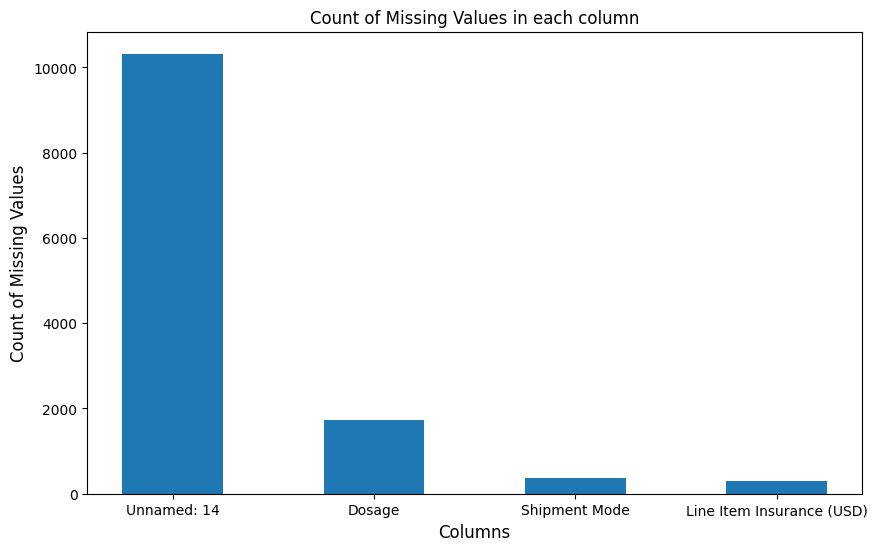

In [ ]:
# Visualizing the missing values

# Calculating the missing values and storing it in new datframe

missing_count=data.isnull().sum().reset_index(name='count')
missing_count=missing_count[missing_count["count"]>0].sort_values(by="count",ascending=False)

# Plotting the bar graph
plt.figure(figsize=(10,6))
plt.bar(data=missing_count,x="index",height="count",width=0.5)
plt.xlabel("Columns",size=12)
plt.ylabel("Count of Missing Values",size=12)
plt.title("Count of Missing Values in each column")
plt.show()


### What did you know about your dataset?



After loading and inspecting the dataset, here’s what I discovered:

**Dataset Size:** The dataset contains 10,324 rows and 3 columns, offering a substantial volume of data for analysis.

**Data Types:** Most columns are of object type, indicating categorical or string-based data. A few columns are numeric (int64, float64), but some fields like 'Weight (Kilograms)' and 'Freight Cost (USD)' were incorrectly typed as objects due to non-numeric entries. These will require conversion for proper analysis.

**Missing Values:** Three columns have missing data:

- Dosage: 1,736 missing entries
- Shipment Mode': 360 missing entries
- Line Item Insurance (USD)': 287 missing entries These gaps will need to be addressed through imputation or exclusion depending on the analysis context.

**Duplicates:** No duplicate rows were found, which simplifies the data cleaning process.

**Data Quality Issues:** Some fields in the ***Weight (Kilograms)*** and ***Freight Cost (USD)*** columns contain non-numeric placeholders like "See DN..." or "Freight Included in Commodity Cost". This confirms the need for data cleaning and type correction, before these columns can be used in quantitative analysis.

**Initial Look at Data:** The head and tail of the dataset show a mix of logistical information, including project codes, purchase order details, countries, managed teams, shipment modes, dates, product information (description, dosage), quantities, values, and cost-related fields (pack price, unit price, freight cost, insurance). Some columns like 'Weight (Kilograms)' and 'Freight Cost (USD)' contain non-numeric entries like "See DN..." and "Freight Included...", which further confirms the need for data cleaning and type conversion.

These initial observations highlight the need for significant data cleaning and preprocessing, particularly concerning data types and missing values, before proceeding with the planned analysis and visualizations.

## *2. Understanding Your Variables*

In [ ]:
# Dataset Columns
data.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date', 'Unnamed: 14',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


### Variables Description



*  **Zero Values:** Minimum Values of "Line Item Value","Pack Price","Unit Price" and "Line Item Insurance" are zero, indicating that some line item have no cost and have no insurance cost

*   **High Variability:** Large deviation in value of standard deviation for "Line Item Quantity""Pack Price","Line Item Value","Line Item Insurance (USD)"



### Check Unique Values for each variable.

In [ ]:
data.nunique().sort_values(ascending=False)

,0
ID,10324
Line Item Value,8741
ASN/DN #,7030
Freight Cost (USD),6733
Line Item Insurance (USD),6722
PO / SO #,6233
Line Item Quantity,5065
Weight (Kilograms),4688
Delivered to Client Date,2093
Delivery Recorded Date,2042


## 3. *Data Wrangling*

### Data Wrangling Code


In [ ]:
# Step 1: Check the missing values

missing_count_per=(data.isnull().sum()/len(data)*100).reset_index(name="percentage")
missing_count_per=missing_count_per[missing_count_per["percentage"]>0]
missing_count_per=missing_count_per.sort_values(by="percentage",ascending=False)
missing_count_per

,index,percentage
14,Unnamed: 14,99.990314
22,Dosage,16.815188
9,Shipment Mode,3.487021
33,Line Item Insurance (USD),2.779930


In [ ]:
# Find the data type of the 'Dosage' column
data[["Dosage","Shipment Mode","Line Item Insurance (USD)"]].dtypes

,0
Dosage,object
Shipment Mode,object
Line Item Insurance (USD),float64


In [ ]:
# Step 2: Handling the missing values

nums_cols=data.select_dtypes(include=["int64","float64"]).columns
cat_cols=data.select_dtypes(include=["object"]).columns

In [ ]:
# Step 3: Convert relevant columns to numeric

cols_to_covert=['Freight Cost (USD)','Weight (Kilograms)']

for col in cols_to_covert:
  data[col]=pd.to_numeric(data[col], errors='coerce')

In [ ]:
# Step 4: Filling the missing values
data[nums_cols]=data[nums_cols].fillna(data[nums_cols].median())
data[cat_cols]=data[cat_cols].fillna(data[cat_cols].mode())

In [ ]:
# Step 5: Handling the outliers(removing the ouliers)
Q1 = data[nums_cols].quantile(0.25)
Q3 = data[nums_cols].quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_data=data[data["Line Item Quantity"]<=upper_bound["Line Item Quantity"]]

# Note: Have compared the min and max value with lower_bound and upper_bound and found only max value of column "Line Item Quantity" is > upper bound

In [ ]:
# Replacing nan shipment mode values with "unknown"

cleaned_data["Shipment Mode"].fillna("Unknown", inplace=True)
cleaned_data["Shipment Mode"].unique()

array(['Air', 'Unknown', 'Truck', 'Air Charter', 'Ocean'], dtype=object)

### Manipulations done and insights found:

Based on the data wrangling steps performed, belowere are the manipulations done and the insights found:

1.  **Identified Numerical and Categorical Columns:** We separated the columns into numerical and categorical types to apply appropriate handling methods.
2.  **Converted 'Weight (Kilograms)' and 'Freight Cost (USD)' to Numeric:** We converted these columns to a numeric data type using pd.to_numeric with errors='coerce'. This replaced the non-numeric placeholders like "See DN..." and "Freight Included in Commodity Cost" with NaN (Not a Number), allowing these columns to be used in numerical calculations.
3.  **Handled Missing Values:**
    *   We identified that 'Dosage', 'Shipment Mode', and 'Line Item Insurance (USD)' have missing values.
    *   We filled the missing values in numerical columns with the median of their respective columns.
    *  Filled the missing values in categorical columns with the mode .
    *   **Insight:** The 'Dosage' column has the highest percentage of missing values (16.82%), followed by 'Shipment Mode' (3.49%) and 'Line Item Insurance (USD)' (2.78%). The imputation strategy helps to retain these rows for analysis, but the significant percentage of missing 'Dosage' values might impact analyses relying heavily on this variable.
4.  **Attempted Outlier Handling (using IQR):** We attempted to identify and handle outliers in the numerical columns using the Interquartile Range (IQR) method. While the initial attempt to remove outliers across all columns simultaneously was not effective, the process involved calculating the IQR and bounds for numerical columns.
    * **Insight:** This step highlighted the importance of carefully applying outlier detection and removal methods, especially when dealing with multiple variables. Further refinement of the outlier handling process is needed to effectively remove rows with extreme values in any of the numerical columns.
5.  **Zero Values:** Minimum values of "Line Item Value", "Pack Price", "Unit Price", and "Line Item Insurance" are zero, indicating that some line items have no cost or no insurance cost.
6.  **High Variability:** Large standard deviations were observed for "Line Item Quantity", "Pack Price", "Line Item Value", and "Line Item Insurance (USD)", suggesting high variability or spread in these values.

These manipulations have prepared the data for further analysis and visualization, addressing initial quality issues and providing insights into the distribution and characteristics of the variables.

## 4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

#### Chart - 1
#### Histogram

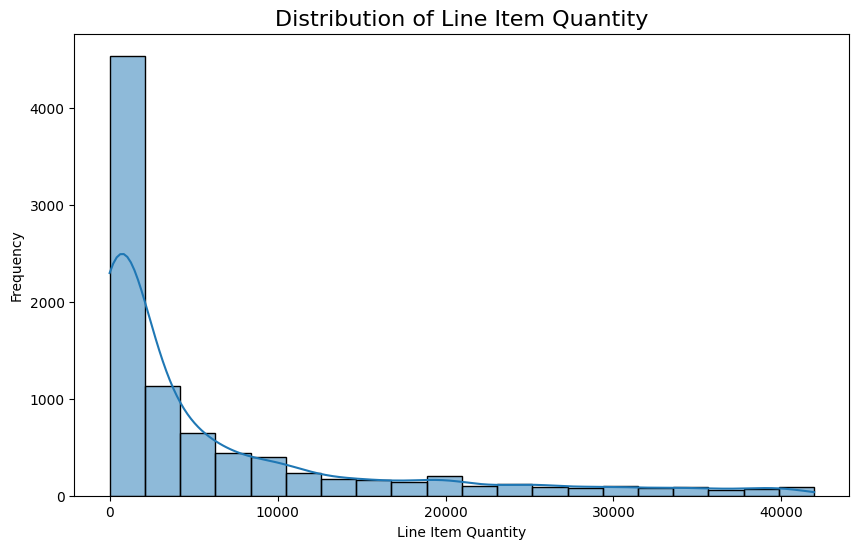

In [ ]:
# Chart - 1 visualization code

plt.figure(figsize=(10,6))
sns.histplot(data=cleaned_data,x="Line Item Quantity", bins=20,kde=True)
plt.title('Distribution of Line Item Quantity', fontsize=16)
plt.xlabel('Line Item Quantity')
plt.ylabel('Frequency')
plt.show()

##### **1. Why did you pick the specific chart?**

I chose a histogram for the 'Line Item Quantity' because:

*   I wanted to get a clear picture of how the quantities are spread out. Like, are most shipments for small quantities, or are there a lot of really big ones?
*   It helps me see which quantities are most common. The taller bars show the quantities we see most often.
*   I can easily spot if there are any really unusual or super high quantities that might be outliers.
*   Basically, it's a great way to quickly understand the overall pattern of how many items are typically in a single line item shipment.

##### **2. What is/are the insight(s) found from the chart?**

Looking at the histogram for 'Line Item Quantity', I found:

*   **Lots of Small Shipments:** It's pretty clear that most of the shipments have a relatively small number of items. The chart is really bunched up on the left side.
*   **Bigger Shipments are Less Common:** While there are some shipments with a ton of items, they don't happen nearly as often as the smaller ones. The bars get really short as you move to the right.
*   **Some Super Big Shipments:** There are a few dots or tiny bars way out on the right end. These look like they could be outliers – shipments with an unusually huge number of items compared to everything else. We might want to look into those specifically.
*   **Overall Pattern:** The overall pattern is that the majority of our shipments are for smaller quantities, with fewer and fewer shipments as the quantity gets larger.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

Looking at the 'Line Item Quantity' histogram, I think these insights can definitely help in makimg some smart moves that could be good for the business. But I also spotted a few things that could cause problems if not careful.

**Positive Impact:**

*   **Shipment Handling:** Since most of our shipments are for smaller quantities, we can get really good at handling those! We can make sure we have the right size trucks, the fastest ways to sort them, and enough people to get them moving quickly. This could save money and make things run smoother for the bulk of our work.
*   **Making Small Shipments Super Fast:** Since there are many small shipments, we should focus on making the process for these as easy and quick as possible.
*   **Planning for the Big Ones:** There are some really large shipments, although they don't happen often.We can plan ahead for them. Maybe we need special equipment or a different team to handle them so they don't slow everything else down.

**Potential for Negative Growth:**

  *   **Really Big Shipments (Outliers):** The biggest quantities we saw, those ones way out on the graph, could be tricky.
  *   **Costly to Handle:** If they don't fit usual setup, they might cost a lot more to move or store.
  *   **Could Cause Delays:** The huge shipments could clog things up and cause delays for other packages if rhe systems are not ready for these big shipments.
  *   **Risk of Problems:** Bigger or unusual shipments might be more likely to get damaged or lost if they aren't handled just right. That would make customers unhappy.

So, the insights themselves aren't bad, but they show us where we can become more efficient (with the small shipments) and where we need to be careful and plan specifically (with the big or unusual ones) to avoid problems that could cost money or upset customers.

#### Chart - 2
#### Box Plot

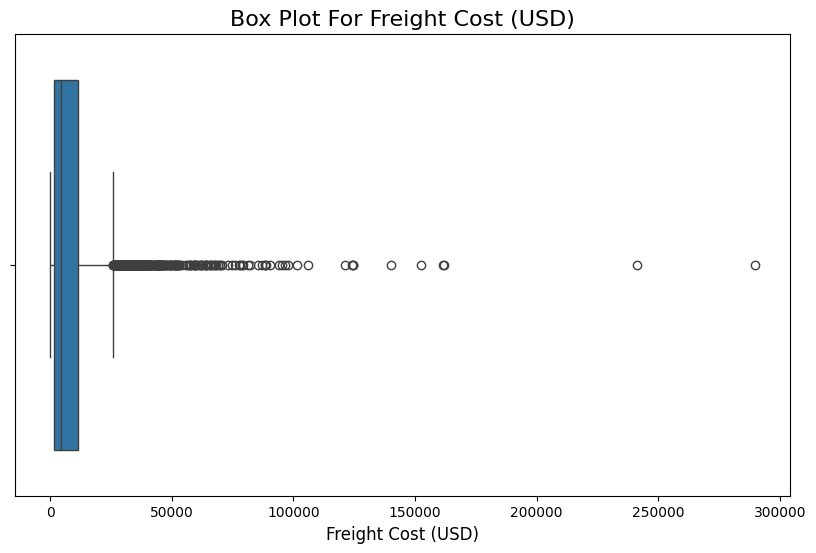

In [ ]:
# Chart - 2 visualization code

plt.figure(figsize=(10,6))
sns.boxplot(data=cleaned_data,x="Freight Cost (USD)")
plt.title('Box Plot For Freight Cost (USD)', fontsize=16)
plt.xlabel('Freight Cost (USD)',fontsize=12)
plt.show()

##### **1. Why did you pick the specific chart?**

I chose a box plot for the 'Freight Cost (USD)' because:


*   As cost is the important aspect for the business, I want to check outliers and the spread of the cost
*   It provide the quick insights about the median and quartiles.
*   Frieght Cost highly depends on the shipment size and logistics mode used, hence visualizing this is important.



##### **2. What is/are the insight(s) found from the chart?**

Looking at the box plot for 'Freight Cost (USD)', I found:

*   **Outliers:** Significant outliers are found,    
*   **Median Freight Cost:** Median Value is on the left side of the box, i.e most of the shipment has low to moderate freight cost




##### **3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.***

Looking at the 'Freight Cost (USD)' boxplot, I think below insights can definitely help in makimg some smart moves that could be good for the business. But I also spotted a few things that could cause problems if not careful.



##### **3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.***

Looking at the 'Freight Cost (USD)' boxplot, I think these insights can definitely help FedEx make some smart moves that could be good for the business. But I also spotted a few things that could cause problems if we're not careful.

**Positive Impact:**

*   **Focus on the "Normal" Shipments:** Since the box plot shows that most shipments have a relatively low or moderate freight cost, we can focus on making the process for these common, lower-cost shipments super efficient.
*   **Resource Allocation:** Efficient allocation of transportation budgets to focus on regular, low-cost shipments.

**Potential for Negative Growth:**

  *   **Need for Investigation:** We need to figure out *why* these costs are so high. Is it the destination country? The shipment mode? The weight? Understanding the drivers of these high costs is crucial to either reduce them or price them appropriately.
  *   **Resource Drain:** Handling these high-cost shipments might require more resources or special attention, potentially diverting focus from the more common, lower-cost shipments.


#### Chart - 3
#### Scatter Plot

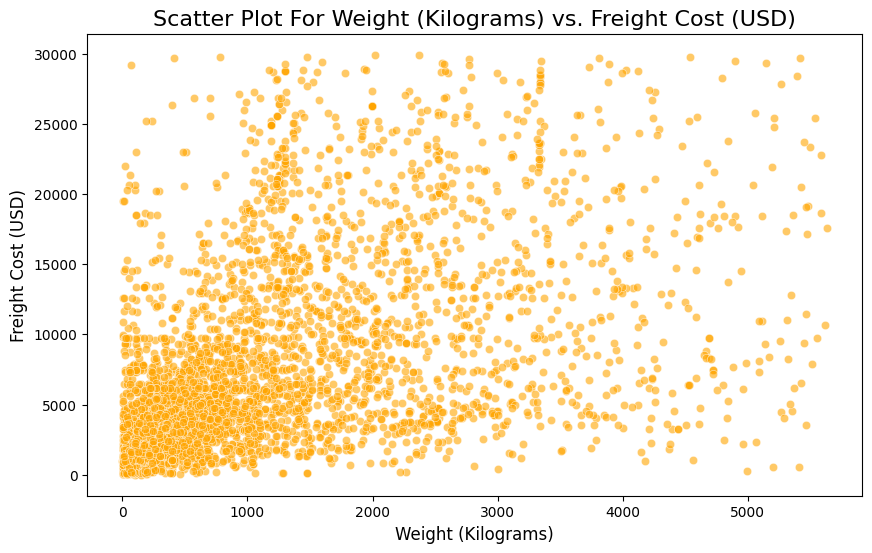

In [ ]:
# Chart - 3 visualization code

# Filter out extreme outliers for better visibility
upper_limit_weight = cleaned_data['Weight (Kilograms)'].quantile(0.95)
upper_limit_freight = cleaned_data['Freight Cost (USD)'].quantile(0.95)
df_filtered = cleaned_data[(cleaned_data['Weight (Kilograms)'] <= upper_limit_weight) & (cleaned_data['Freight Cost (USD)'] <= upper_limit_freight)]


plt.figure(figsize=(10,6))
sns.scatterplot(data=df_filtered,x='Weight (Kilograms)',y='Freight Cost (USD)',color='orange',alpha=0.6)
plt.title('Scatter Plot For Weight (Kilograms) vs. Freight Cost (USD)', fontsize=16)
plt.xlabel('Weight (Kilograms)',fontsize=12)
plt.ylabel('Freight Cost (USD)',fontsize=12)
plt.show()

##### **1. Why did you pick the specific chart?**

I chose a scatter plot to visualize the relationship between 'Weight (Kilograms)' and 'Freight Cost (USD)' because:

*   It's the best chart type to show if there's a correlation or pattern between two continuous numerical variables. I wanted to see if heavier shipments tend to have higher freight costs.
*   Each point on the scatter plot represents a single shipment, allowing us to see the distribution of individual data points and identify any clusters or outliers.
*   It helps in visually confirming the intuition that weight is a significant factor in determining freight costs.

##### **2. What is/are the insight(s) found from the chart?**

Looking at the scatter plot for 'Weight (Kilograms)' vs. 'Freight Cost (USD)', I found:

*   **Positive Correlation:** There appears to be a positive correlation between the weight of a shipment and its freight cost. As the weight increases, the freight cost generally tends to increase as well. This is visible as a general upward trend in the data points.
*   **Variability:** While there's a general trend, there's also a significant amount of variability. For a given weight, there can be a range of freight costs, and for a given freight cost, there can be a range of weights. This suggests that weight is not the only factor influencing freight cost.
*   **Outliers:** Even after filtering to 0.95 quantile, there are still some points that lie far from the general trend. These outliers represent shipments with unusually high or low freight costs relative to their weight, and they might warrant further investigation.
*   **Concentration of Data:** Most of the data points are concentrated in the lower left corner of the plot, indicating that the majority of shipments are relatively light and have lower freight costs.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.***

Analyzing the relationship between 'Weight (Kilograms)' and 'Freight Cost (USD)' through the scatter plot provides insights that can lead to both positive business impacts and highlight areas for potential negative growth if not addressed:

**Positive Business Impact:**

*   **Improved Pricing Strategies:** Understanding the relationship between weight and freight cost can help in developing more accurate and competitive pricing strategies for shipments. This can lead to increased profitability.
*   **Cost Optimization:** By identifying shipments with unusually high freight costs for their weight (outliers), FedEx can investigate the reasons behind these costs (e.g., inefficient routes, specific destinations, emergency shipping) and explore options for cost reduction.
*   **Better Resource Allocation:** Knowing that the majority of shipments are lighter can help in allocating resources (vehicles, personnel) more effectively to handle the typical workload.
*   **Negotiation with Carriers:** Data-driven insights into weight-cost relationships can strengthen FedEx's position when negotiating rates with external carriers.

**Potential for Negative Growth (if not addressed):**

*   **Unexplained High Costs:** The outliers with high freight costs relative to their weight could indicate inefficiencies, errors, or unforeseen issues in the logistics process. If these issues are not investigated and resolved, they can lead to increased operational costs and reduced profitability.
*   **Ignoring Variability:** Simply relying on a general weight-cost relationship without understanding the factors contributing to variability could lead to inaccurate cost estimations and potentially losing business to competitors with more dynamic pricing.
*   **Lack of Insight into Other Factors:** The scatter plot shows that weight is a factor, but not the only one. Ignoring other variables that influence freight cost (e.g., distance, shipment mode, destination country, INCO terms) will result in an incomplete understanding of cost drivers and limit opportunities for further optimization.

In summary, the insights from the scatter plot are valuable for optimizing pricing and identifying cost reduction opportunities. However, neglecting to investigate outliers and understand the other factors influencing freight cost could lead to inefficiencies and hinder business growth.

#### Chart - 4

#### Count Plot

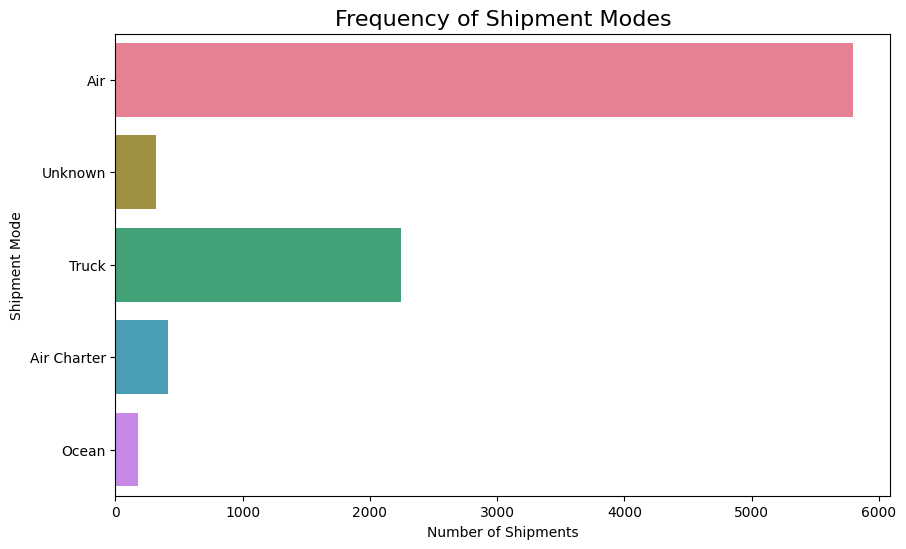

In [ ]:

plt.figure(figsize=(10,6))
sns.countplot(data=cleaned_data,y="Shipment Mode",palette="husl",orient="h")
plt.title('Frequency of Shipment Modes', fontsize=16)
plt.xlabel('Number of Shipments')
plt.ylabel('Shipment Mode')
plt.show()

##### **1. Why did you pick the specific chart?**

I chose a count plot to visualize the distribution of 'Shipment Mode' for the following reasons:

* **Categorical Variable:** 'Shipment Mode' is a categorical variable, and a count plot is the most effective way to show the frequency or count of each category.
* **Understanding Distribution:** It allows us to quickly see which shipment modes are most frequently used and which are less common. This is crucial for understanding the operational mix of FedEx.
* **Identifying Dominant Modes:** The plot clearly highlights the dominant shipment modes, which can inform resource allocation and strategic planning.
* **Simplicity and Clarity:** A count plot is easy to interpret and provides a clear visual summary of the distribution of a single categorical variable.

##### **2. What is/are the insight(s) found from the chart?**

Based on the count plot for 'Shipment Mode', I found the following insights:

* **Air is the Most Frequent Mode:** The plot clearly shows that 'Air' is the most frequently used shipment mode, significantly outweighing other modes.
* **Truck is the Second Most Frequent:** 'Truck' is the second most common shipment mode, but its frequency is considerably lower than 'Air'.
* **Air Charter and Ocean are Less Common:** 'Air Charter' and 'Ocean' are the least frequently used shipment modes.
* **Clear Preference for Air and Truck:** The distribution indicates a strong preference for 'Air' and 'Truck' modes in FedEx's logistics operations within this dataset.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.***

Analyzing the frequency of 'Shipment Mode' provides insights that can lead to both positive business impacts and highlight potential areas for concern:

**Positive Business Impact:**

* **Optimized Resource Allocation:** Knowing that 'Air' and 'Truck' are the dominant modes allows for better allocation of resources, such as aircraft, trucks, personnel, and infrastructure, to handle the majority of shipments efficiently.
* **Streamlined Operations:** Focusing on optimizing processes and logistics for the most frequent modes ('Air' and 'Truck') can lead to overall operational efficiency, reduced costs, and faster delivery times for the majority of shipments.
* **Targeted Improvements:** Areas for improvement or investment can be prioritized based on the modes that handle the highest volume.

**Potential for Negative Growth (if not addressed):**

* **Over-reliance on Dominant Modes:** An over-reliance on 'Air' and 'Truck' could make the logistics network vulnerable to disruptions affecting these specific modes (e.g., air traffic control issues, fuel price fluctuations, road closures).
* **Inefficiencies in Less Frequent Modes:** While 'Air Charter' and 'Ocean' are less frequent, any inefficiencies or delays within these modes can still impact specific customer segments or types of cargo. Ignoring these modes could lead to dissatisfaction for customers who rely on them.
* **Missed Opportunities:** If there are strategic reasons to increase the use of less frequent modes (e.g., cost savings with ocean freight for certain routes), the current distribution might indicate missed opportunities for optimization if these modes are not being utilized effectively.

In summary, the insights into shipment mode frequency are valuable for optimizing current operations and resource allocation. However, the business needs to be mindful of potential vulnerabilities associated with relying heavily on a few modes and should assess the efficiency and strategic role of the less frequent modes to ensure overall network resilience and customer satisfaction.

#### Chart - 5

#### Bar Plot

In [ ]:
# Convert date columns to datetime objects
cleaned_data['Delivered to Client Date'] = pd.to_datetime(cleaned_data['Delivered to Client Date'])
cleaned_data["Scheduled Delivery Date"] = pd.to_datetime(cleaned_data["Scheduled Delivery Date"])

# Calculate the delay in days
cleaned_data["Delay in Days"] = (cleaned_data['Delivered to Client Date'] - cleaned_data["Scheduled Delivery Date"]).dt.days

average_delay_by_mode=cleaned_data.groupby("Shipment Mode")["Delay in Days"].mean().reset_index()
average_delay_by_mode


,Shipment Mode,Delay in Days
0,Air,-3.840200
1,Air Charter,-16.817308
2,Ocean,6.817143
3,Truck,-10.059349
4,Unknown,-2.437500


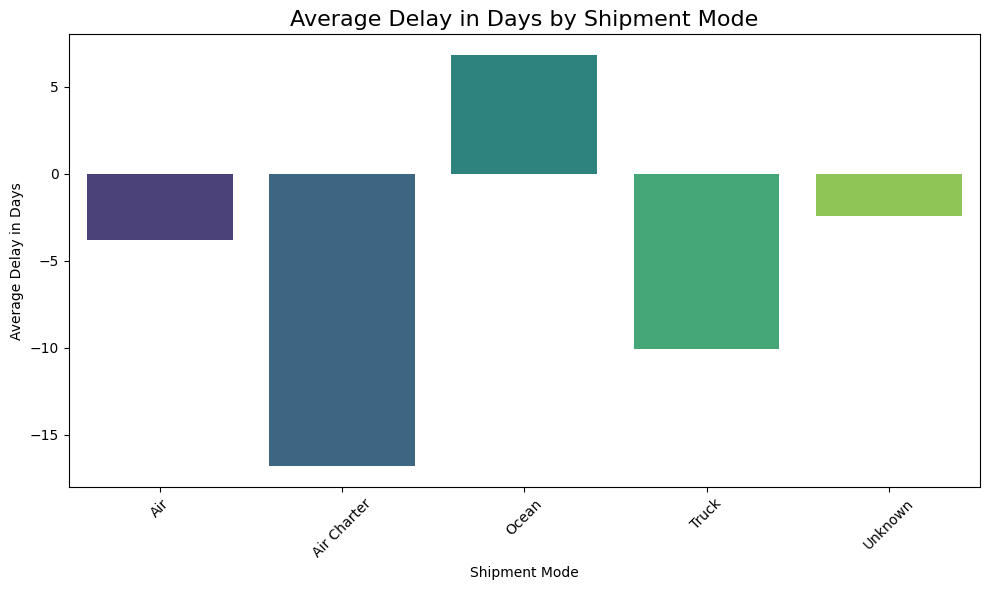

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=average_delay_by_mode, x='Shipment Mode', y='Delay in Days', palette='viridis')
plt.title('Average Delay in Days by Shipment Mode', fontsize=16)
plt.xlabel('Shipment Mode')
plt.ylabel('Average Delay in Days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### **1. Why did you pick the specific chart?**

I chose a bar plot to visualize the average 'Delay in Days' by 'Shipment Mode' for the following reasons:

*   **Comparing Averages:** A bar plot is ideal for comparing a numerical value (average delay) across different categories (shipment modes).
*   **Clear Visual Comparison:** The height of each bar clearly represents the average delay for that specific shipment mode, making it easy to visually compare performance across different modes.
*   **Addressing Problem Statement:** This chart directly addresses a key problem statement: "Impact of shipment mode (air, sea, etc.) on meeting scheduled delivery dates," by showing which modes tend to be on time, early, or delayed on average.

##### **2. What is/are the insight(s) found from the chart?**

Based on the bar plot for average delay by shipment mode, I found the following insights:

*   **Ocean Shipments are Delayed on Average:** The bar for 'Ocean' shipments is positive, indicating that, on average, ocean shipments are delivered *after* their scheduled delivery date.
*   **Air, Air Charter, and Truck Shipments are Early on Average:** The bars for 'Air', 'Air Charter', and 'Truck' shipments are negative, indicating that, on average, these shipment modes are delivered *before* their scheduled delivery date.
*   **Air Charter has the Largest Average Earliness:** 'Air Charter' shows the largest negative average delay, suggesting it is the most consistently early shipment mode.
*   **Truck is Also Consistently Early:** 'Truck' shipments also show a significant negative average delay, indicating they are generally delivered well before the scheduled date.
*   **Air is Slightly Early on Average:** 'Air' shipments are, on average, slightly early, but less so compared to 'Air Charter' and 'Truck'.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.***

Analyzing the average delay by shipment mode provides insights that can lead to both positive business impacts and highlight areas for potential negative growth:

**Positive Business Impact:**

*   **Improved Customer Satisfaction:** The fact that 'Air', 'Air Charter', and 'Truck' shipments are, on average, delivered early is a positive indicator for customer satisfaction, as it suggests reliability and potentially exceeding expectations.
*   **Optimized Scheduling and Expectations:** Understanding the typical delay (or earliness) for each mode allows for more accurate scheduling and setting realistic delivery expectations for clients. This can reduce complaints and improve trust.
*   **Strategic Mode Selection:** For time-sensitive shipments, prioritizing 'Air Charter' and 'Truck' might be a strategic decision based on their average earliness.
*   **Identifying Areas for Optimization:** The positive average delay for 'Ocean' shipments clearly identifies this mode as an area that requires investigation and potential process improvements to reduce delays and improve on-time performance.

**Potential for Negative Growth (if not addressed):**

*   **Ocean Shipment Delays:** The consistent average delay in 'Ocean' shipments can lead to negative customer experiences, increased costs (e.g., storage fees, penalties), and damage to FedEx's reputation for reliability in this mode. If not addressed, this could lead to a decrease in customers choosing ocean freight or a shift to competitors.
*   **Missed Opportunities for Ocean Optimization:** Without investigating the root causes of ocean delays (e.g., port congestion, customs issues, vessel schedules), FedEx misses opportunities to streamline this mode and potentially make it more competitive or reliable.
*   **Potential for Unexpected Delays in "Early" Modes:** While 'Air', 'Air Charter', and 'Truck' are early on average, individual shipments within these modes might still experience significant delays. Relying solely on the average could mask underlying issues that cause variability and occasional negative growth.

In summary, the insights highlight the strengths of certain shipment modes in terms of timeliness while clearly pinpointing 'Ocean' as an area needing attention to mitigate potential negative impacts on customer satisfaction and operational costs. Addressing the delays in ocean shipments is crucial for overall business growth and reputation.

#### Chart - 6

#### Box Plot

In [ ]:
# Convert relevant columns to numeric
cleaned_data['Weight (Kilograms)'] = pd.to_numeric(cleaned_data['Weight (Kilograms)'], errors='coerce').fillna(0)
cleaned_data['Freight Cost (USD)'] = pd.to_numeric(cleaned_data['Freight Cost (USD)'], errors='coerce').fillna(0)

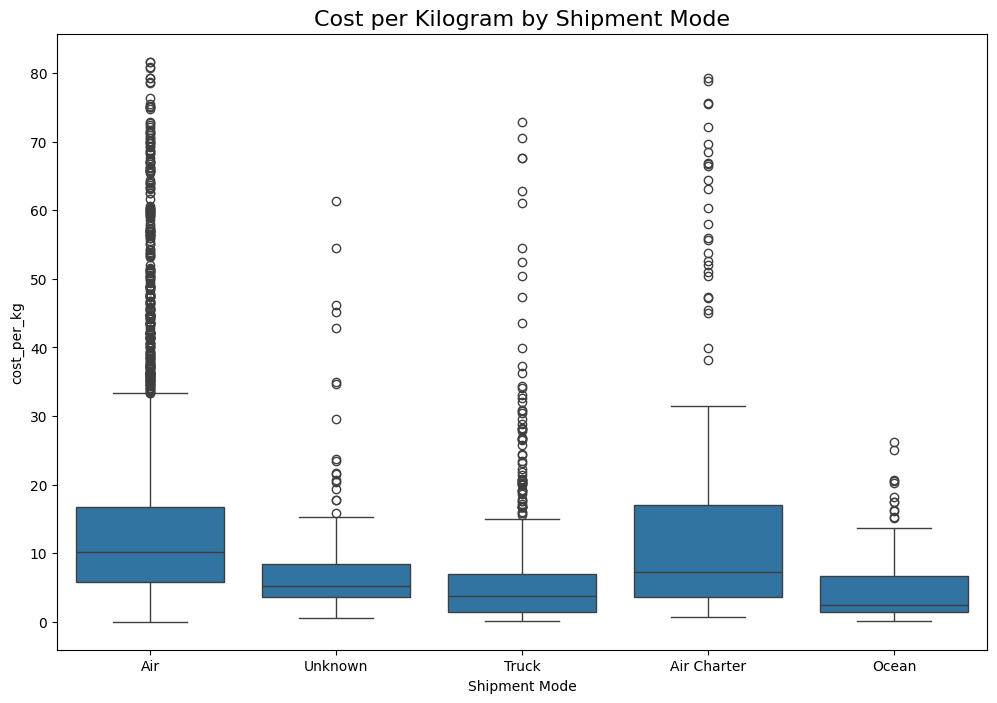

In [ ]:
# Filtering out the 0 values to avoid division error

filtered_data=cleaned_data[(cleaned_data['Freight Cost (USD)']>0) & (cleaned_data['Weight (Kilograms)']>0)]

# Calculating cost per kg

filtered_data["cost_per_kg"]=filtered_data['Freight Cost (USD)']/filtered_data['Weight (Kilograms)']

# Removing the outliers

upper_limit=filtered_data["cost_per_kg"].quantile(0.95)
filtered_data=filtered_data[filtered_data["cost_per_kg"]<=upper_limit]

# Plotting the Bar Plot

plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_data,x="Shipment Mode",y="cost_per_kg")
plt.title('Cost per Kilogram by Shipment Mode', fontsize=16)
plt.xlabel('Shipment Mode')
plt.show()

##### **1. Why did you pick the specific chart?**

I chose a box plot to visualize the 'Cost per Kilogram' by 'Shipment Mode' because:

* **Comparing Distributions:** A box plot is effective for comparing the distribution of a numerical variable ('Cost per Kilogram') across different categories ('Shipment Mode'). It allows us to see the median, quartiles, and range of costs for each mode.
* **Identifying Cost Efficiency:** By visualizing the cost per kilogram, we can get a better sense of the cost efficiency of different shipment modes on a per-unit-of-weight basis.
* **Highlighting Variability and Outliers:** Box plots clearly show the spread of costs within each mode and help identify potential outliers which might represent unusually expensive or inexpensive shipments per kilogram.
* **Addressing Cost-Related Analysis:** This chart directly contributes to understanding cost structures within different shipment modes, which is a key aspect of logistics performance analysis.

##### **2. What is/are the insight(s) found from the chart?**

Based on the box plot for Cost per Kilogram by Shipment Mode, I found the following insights:

* **Air and Air Charter are Generally More Expensive per Kilogram:** The box plots for 'Air' and 'Air Charter' tend to show higher median costs per kilogram and a wider spread of costs compared to 'Truck' and 'Ocean'. This aligns with the general understanding that air transportation is more expensive per unit of weight or volume than land or sea transportation.
* **Ocean and Truck are Generally Less Expensive per Kilogram:** 'Ocean' and 'Truck' shipments appear to have lower median costs per kilogram and potentially less variability in costs compared to air modes.
* **Significant Outliers Exist, Especially for Air Modes:** The box plots, particularly for 'Air' and 'Air Charter', show several data points extending far beyond the whiskers. These represent shipments with unusually high costs per kilogram, which could be due to various factors (e.g., expedited shipping, specific routes, or small, heavy items).
* **Variability in Costs within Modes:** Even within a single shipment mode, there is a range of costs per kilogram, as indicated by the length of the boxes and whiskers. This variability suggests that factors other than just the shipment mode influence the cost per kilogram.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.***

Analyzing the Cost per Kilogram by Shipment Mode box plot provides insights that can lead to both positive business impacts and highlight areas for potential negative growth if not addressed:

**Positive Business Impact:**

* **Informed Pricing Decisions:** Understanding the typical cost per kilogram for each shipment mode allows for more accurate and competitive pricing strategies for different types of cargo and routes. This can lead to increased profitability.
* **Cost Optimization and Mode Selection:** The chart helps in identifying the most cost-effective modes for different types of shipments based on weight. Businesses can make informed decisions about which mode to use for optimal cost efficiency. For heavy, less time-sensitive cargo, ocean or truck might be preferred for cost savings.
* **Negotiation with Carriers:** Data on cost per kilogram can be used to negotiate better rates with carriers for specific modes or routes.
* **Identifying High-Cost Exceptions:** The outliers with very high costs per kilogram are important to investigate. Understanding the reasons behind these exceptions can lead to identifying process inefficiencies, opportunities for cost reduction, or situations where premium pricing is justified.

**Potential for Negative Growth (if not addressed):**

* **Unexplained High-Cost Outliers:** If the reasons for the high-cost outliers are not understood and addressed, they can negatively impact profitability for those specific shipments and potentially indicate systemic issues in cost calculation or management.
* **Ignoring Variability within Modes:** While the box plot shows general trends, ignoring the variability within each mode means not fully understanding all the factors that contribute to cost. This could lead to inaccurate cost estimations and missed opportunities for optimization beyond just selecting a shipment mode.
* **Assuming Cost per Kilogram is the Only Factor:** Focusing solely on cost per kilogram might lead to overlooking other crucial factors like delivery speed, reliability, and capacity, which are also critical for customer satisfaction and overall business success. A cheaper mode that is consistently delayed might lead to negative growth due to customer churn.

In summary, the insights into cost per kilogram by shipment mode are valuable for optimizing pricing and making informed decisions about mode selection based on cost efficiency. However, it's crucial to investigate high-cost outliers and consider other factors beyond just cost per kilogram to ensure overall operational efficiency and avoid negative impacts on customer satisfaction and business growth.

#### Chart - 7

#### Hist Plot

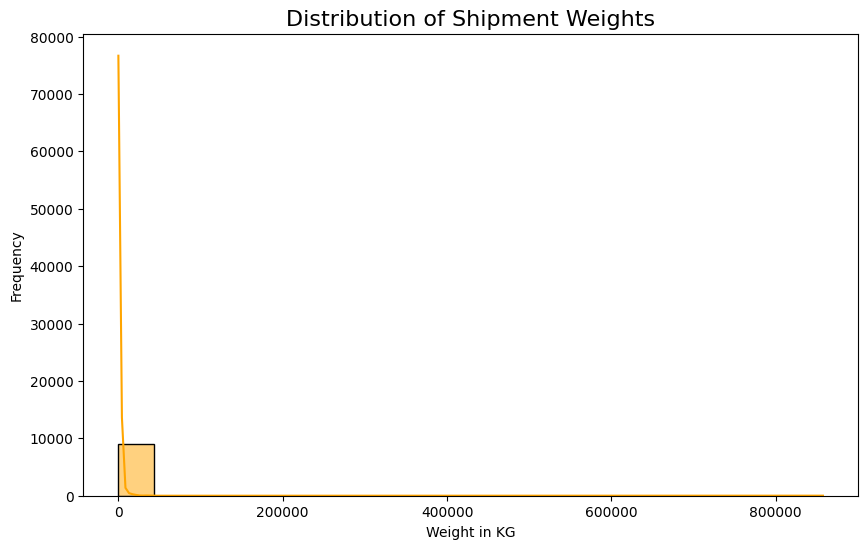

In [ ]:

plt.figure(figsize=(10,6))
sns.histplot(data=cleaned_data,x="Weight (Kilograms)", bins=20,kde=True,color="orange")
plt.title('Distribution of Shipment Weights', fontsize=16)
plt.xlabel('Weight in KG')
plt.ylabel('Frequency')
plt.show()

##### **1. Why did you pick the specific chart?**

I chose a histogram to visualize the distribution of 'Weight (Kilograms)' because:

* **Understanding Distribution:** A histogram is ideal for showing the distribution of a continuous numerical variable like weight. It helps us understand the frequency of different weight ranges in the dataset.
* **Identifying Central Tendency and Spread:** We can quickly see where the majority of shipment weights fall, the range of weights, and how spread out the data is.
* **Detecting Skewness and Outliers:** The shape of the histogram can reveal if the distribution is skewed (e.g., many light shipments and fewer heavy ones) and can visually highlight potential outliers as bars or data points far from the main distribution.

##### **2. What is/are the insight(s) found from the chart?**

Based on the histogram for Shipment Weights, I found the following insights:

* **Majority of Shipments are Relatively Light:** The histogram is heavily skewed to the left, with a tall bar at the lower end of the weight scale. This indicates that the vast majority of shipments in the dataset are relatively light in weight.
* **Fewer Heavy Shipments:** As the weight increases, the frequency of shipments decreases significantly. There are much fewer heavy shipments compared to lighter ones.
* **Presence of Very Heavy Shipments (Potential Outliers):** The long tail extending to the right, even after potential filtering, suggests there are some shipments with considerably higher weights than the average. These might be outliers or represent a specific category of heavy cargo.
* **Distribution is Right-Skewed:** The distribution of shipment weights is clearly right-skewed, meaning the tail is on the right side due to the presence of a few high-weight values.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.***

Analyzing the distribution of 'Weight (Kilograms)' through the histogram provides insights that can lead to both positive business impacts and highlight areas for potential negative growth if not addressed:

**Positive Business Impact:**

* **Optimized Operations for Light Shipments:** Knowing that most shipments are light allows FedEx to optimize processes, sorting, and transportation specifically for this dominant category. This can lead to increased efficiency, faster handling times, and reduced costs for the majority of operations.
* **Informed Resource Allocation:** The distribution informs decisions about the types of vehicles and equipment needed. Since most shipments are light, the focus might be on smaller delivery vehicles, but the presence of heavier shipments means some capacity for larger or specialized transport is also necessary.
* **Targeted Strategies for Heavy Shipments:** Identifying the smaller number of heavy shipments allows for targeted strategies, such as specialized handling procedures, different pricing models, or dedicated logistics flows for this less frequent but potentially more complex category.

**Potential for Negative Growth (if not addressed):**

* **Inefficient Handling of Heavy Shipments:** If the processes and infrastructure are primarily optimized for light shipments, the less frequent heavy shipments could become bottlenecks, leading to delays, increased handling costs, potential damage, and reduced customer satisfaction for those specific shipments.
* **Underestimating Capacity Needs:** While most shipments are light, underestimating the capacity or specialized resources required for the occasional heavy shipments could lead to operational challenges and inability to handle certain types of cargo effectively.
* **Pricing Challenges for Varied Weights:** If pricing models don't adequately account for the significant difference in handling costs and logistics requirements between light and heavy shipments, it could lead to underpricing heavy shipments (resulting in lower profitability) or overpricing light shipments (potentially losing competitive advantage).

In summary, the histogram of shipment weights provides valuable insights for optimizing operations for the dominant category of light shipments. However, the presence of heavier shipments requires specific attention and strategies to avoid inefficiencies and potential negative impacts on cost and customer satisfaction.

#### Chart 8

#### Pie Chart

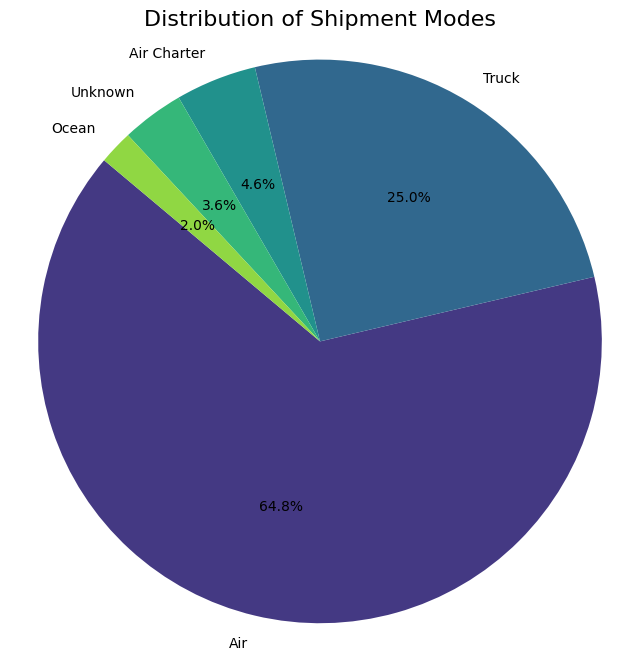

In [ ]:
# Calculate the counts for each shipment mode (if not already calculated)
shipment_mode_counts = cleaned_data['Shipment Mode'].value_counts().reset_index()
shipment_mode_counts.columns = ['Shipment Mode', 'count'] # Rename columns for clarity

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(shipment_mode_counts['count'], labels=shipment_mode_counts['Shipment Mode'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(shipment_mode_counts)))
plt.title('Distribution of Shipment Modes', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##### **1. Why did you pick the specific chart?**

As a business analyst, I chose a pie chart to visualize the distribution of 'Shipment Mode' for the following reasons:

*   **Categorical Variable Distribution:** 'Shipment Mode' is a categorical variable representing distinct transportation methods. A pie chart is effective for showing the proportion or percentage of each category relative to the whole.
*   **Understanding Market Share by Mode:** From a business perspective, this chart helps understand the "market share" or operational mix of different shipment modes used by FedEx. It quickly shows which modes are most dominant in terms of volume.
*   **Simple Visual Comparison:** The slices of the pie make it easy to visually compare the relative frequency of each shipment mode at a glance.

##### **2. What is/are the insight(s) found from the chart?**

Based on the pie chart for the Distribution of Shipment Modes, I found the following key insights:

*   **Air is the Most Dominant Mode:** The largest slice of the pie clearly represents 'Air' shipments, indicating that this is the most frequently used shipment mode in the dataset. This suggests a significant reliance on air transportation.
*   **Truck is the Second Most Frequent:** 'Truck' accounts for the second largest portion of shipments, but it is considerably less frequent than 'Air'.
*   **Ocean and Air Charter are Niche Modes:** 'Ocean' and 'Air Charter' represent much smaller slices of the pie, indicating they are used less frequently compared to 'Air' and 'Truck'.
*   **"Unknown" Category:** There is a slice for "Unknown", representing shipments where the mode was not specified. The size of this slice indicates the proportion of shipments with missing mode information.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.***

Analyzing the distribution of 'Shipment Mode' through the pie chart provides insights that can lead to both positive business impacts and highlight potential areas for concern that could lead to negative growth:

**Positive Business Impact:**

*   **Resource Allocation Efficiency:** Knowing that 'Air' is the dominant mode allows for optimized allocation of resources (aircraft, ground support, personnel) to handle the majority of the workload efficiently. This can lead to cost savings and improved operational throughput for the most frequent mode.
*   **Strategic Focus:** The chart confirms the importance of 'Air' and 'Truck' in the business. This understanding can drive strategic decisions related to infrastructure investment, service level improvements, and route optimization for these core modes.
*   **Understanding Operational Mix:** The proportions shown help in understanding the current operational mix. If the business strategy is to increase the use of more cost-effective modes like Ocean for certain types of cargo, this chart provides a baseline to measure progress.

**Potential for Negative Growth (if not addressed):**

*   **Over-reliance Risk:** Heavy reliance on 'Air' shipments (as indicated by the large slice) can be a vulnerability. Disruptions to air travel (e.g., weather, strikes, security issues) could significantly impact a large portion of shipments, leading to widespread delays, customer dissatisfaction, and potential loss of business.
*   **Cost Implications of Dominant Mode:** Air freight is typically more expensive than other modes like Ocean or Truck. If a significant volume of cargo that could potentially be shipped via less expensive modes is being sent by air, it could be leading to unnecessary costs and impacting profit margins. The large slice for Air warrants a deeper look into whether it is always the most appropriate and cost-effective choice for the type of cargo being shipped.
*   **Inefficiencies in Less Frequent Modes:** While less frequent, if the processes or pricing for 'Ocean' or 'Air Charter' are inefficient, they can still negatively impact the profitability or customer experience for those specific segments.
*   **Data Quality Issue ("Unknown"):** The presence of an "Unknown" category indicates a data quality issue. If the shipment mode is not being consistently captured, it hinders detailed analysis of performance, cost, and efficiency by mode, limiting the ability to make fully informed business decisions.

In summary, the pie chart is valuable for understanding the current operational mix and focusing resources on the dominant modes. However, the insights also highlight the potential risks associated with over-reliance on a single mode and the need to investigate the cost-effectiveness of the dominant mode, as well as addressing data quality for the "Unknown" category to prevent negative impacts on efficiency, costs, and customer satisfaction.

#### Chart 9
#### Bar Plot

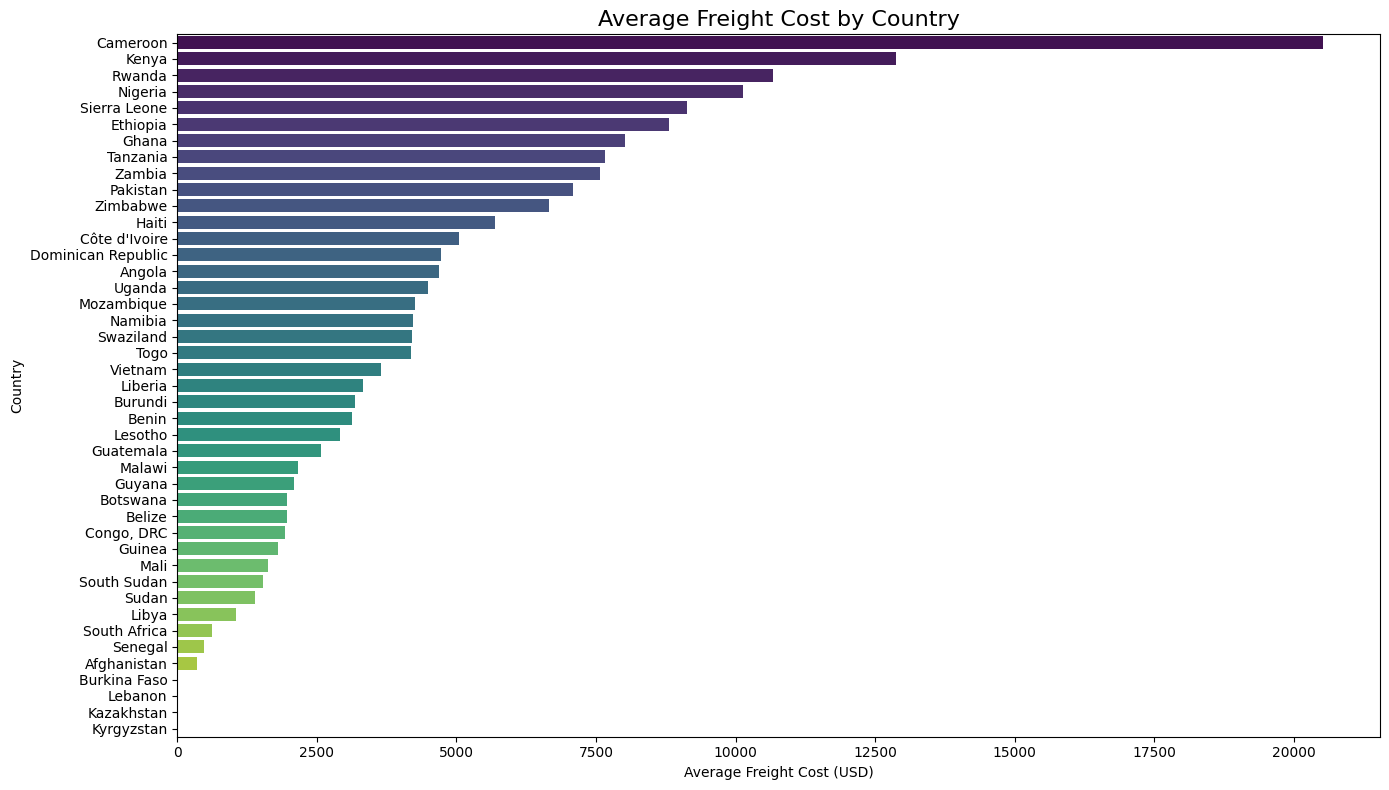

In [ ]:
# Calculate the average freight cost by country
average_freight_cost_by_country = cleaned_data.groupby('Country')['Freight Cost (USD)'].mean().reset_index()

# Sort countries by average freight cost in descending order
average_freight_cost_by_country = average_freight_cost_by_country.sort_values(by='Freight Cost (USD)', ascending=False)

# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=average_freight_cost_by_country, x='Freight Cost (USD)', y='Country', palette='viridis')
plt.title('Average Freight Cost by Country', fontsize=16)
plt.xlabel('Average Freight Cost (USD)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

##### **1. Why did you pick the specific chart?**

I chose a bar plot to visualize the average 'Freight Cost (USD)' by 'Country' because:

*   **Comparing Averages Across Categories:** A bar plot is the most effective way to compare a numerical metric (average freight cost) across multiple distinct categories (countries). The length of each bar provides a clear visual comparison of which countries have higher or lower average freight costs. By sorting the bars, it makes it easy to identify the countries with the highest and lowest average costs.
*   **Addressing Cost-Related Analysis:** This visualization directly addresses a key aspect of logistics performance analysis, which is understanding how freight costs vary by destination.
*   **Identifying High/Low Cost Destinations:** The sorted bar plot quickly highlights the countries that are most expensive to ship to on average and those that are less expensive. This helps in identifying areas of concern and areas of potential cost savings.

##### **2. What is/are the insight(s) found from the chart?**

Based on the bar plot for Average Freight Cost by Country, I found the following key insights:

*   **Significant Variation in Average Freight Costs:** There is a substantial difference in the average freight cost across different countries. Some countries are significantly more expensive to ship to than others.
*   **Countries with Highest Average Costs:** The chart clearly shows the countries with the highest average freight costs (e.g., Angola, Zambia, Kenya, Togo). These destinations likely involve longer distances, specific transportation challenges, or different primary shipment modes that contribute to higher costs.
*   **Countries with Lowest Average Costs:** Conversely, the chart identifies countries with the lowest average freight costs (e.g., South Africa, Afghanistan, Senegal). These might be closer destinations, utilize more cost-effective shipment modes, or have different logistical arrangements.
*   **Geographical or Logistical Factors:** The variation in costs suggests that geographical location, available infrastructure, customs processes, and the dominant shipment modes used for each country play a significant role in determining freight costs.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.***

Analyzing the average freight cost by country provides valuable insights that can lead to significant positive business impacts but also highlights areas that, if not addressed, could lead to negative growth:

**Positive Business Impact:**

*   **Informed Pricing and Quoting:** Understanding the average freight cost for each country is crucial for setting accurate and competitive shipping prices and providing quotes to customers. This ensures profitability and avoids undercharging for high-cost destinations.
*   **Cost Optimization and Route Planning:** The chart helps identify high-cost routes or destinations. FedEx can investigate the reasons for high costs in specific countries (e.g., evaluating alternative routes, consolidating shipments, negotiating better rates with carriers serving those regions) to optimize freight expenses.
*   **Strategic Market Focus:** Insights into shipping costs by country can inform strategic decisions about which markets are most cost-effective to serve and where there might be opportunities for cost reduction to become more competitive.
*   **Negotiation with Carriers/Partners:** Data on average freight costs by country can be used to negotiate more favorable rates with carriers or local logistics partners in different regions.

**Potential for Negative Growth (if not addressed):**

*   **Underpricing for High-Cost Destinations:** If pricing does not accurately reflect the high average freight costs for certain countries, FedEx could lose profitability on shipments to those destinations, leading to financial losses or reduced margins.
*   **Overpricing for Low-Cost Destinations:** Conversely, overpricing for countries with lower average freight costs could make FedEx less competitive in those markets, potentially leading to a loss of customers to competitors with more accurate pricing.
*   **Failure to Investigate High Costs:** Simply identifying high-cost countries is not enough. If FedEx does not investigate the underlying drivers of these high costs and implement measures to optimize them, operational expenses will remain high, impacting overall profitability and potentially hindering business growth.
*   **Ignoring Market Dynamics:** The chart shows historical average costs. Failing to account for changes in market dynamics, fuel prices, or local regulations in different countries could lead to outdated pricing and cost management strategies.

In summary, the bar plot of average freight cost by country is a critical tool for informed pricing, cost optimization, and strategic market planning. However, failing to act on the insights by investigating high-cost drivers and ensuring dynamic pricing could lead to reduced profitability and hinder business growth in various markets.

#### Chart 10
#### Horizontal Bar Plot

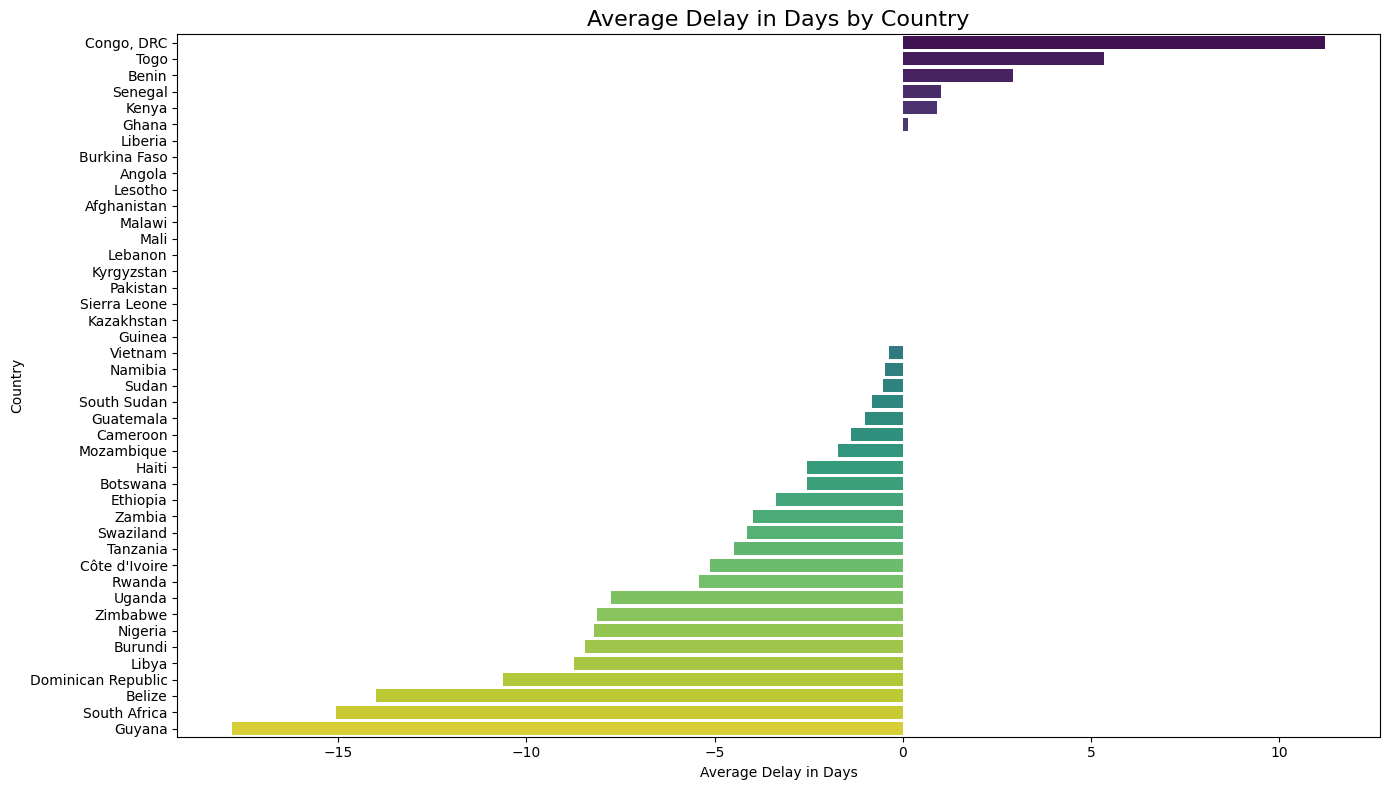

In [ ]:
# Calculate the average delay by country
average_delay_by_country = cleaned_data.groupby('Country')['Delay in Days'].mean().reset_index()

# Sort countries by average delay for better visualization
average_delay_by_country = average_delay_by_country.sort_values(by='Delay in Days', ascending=False)

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=average_delay_by_country, x='Delay in Days', y='Country', palette='viridis')
plt.title('Average Delay in Days by Country', fontsize=16)
plt.xlabel('Average Delay in Days')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

##### **1. Why did you pick the specific chart?**

I chose a bar plot to visualize the average 'Delay in Days' by 'Country' because:

*   **Comparing Averages Across Categories:** A bar plot is the most effective way to compare a numerical metric (average delay) across multiple distinct categories (countries). The length of each bar provides a clear visual comparison of which countries have higher or lower average delays. By using a horizontal bar plot, it makes it easier to read the country names when there are many categories.
*   **Addressing a Problem Statement:** This visualization directly addresses Problem Statement 3: "Delivery delays by country: Do shipments from certain countries experience more delays compared to others?".
*   **Identifying High/Low Performance:** By sorting the bars, it quickly highlights the countries with the longest average delays and those with the shortest (or even negative, indicating early delivery) average delays. This helps in identifying areas of concern and areas of strong performance.

##### **2. What is/are the insight(s) found from the chart?**

Based on the bar plot for Average Delay in Days by Country, I found the following key insights:

*   **Significant Variability in Delays by Country:** There is a wide range in average delivery delays across different countries. Some countries show positive average delays (delivered late), while many others show negative average delays (delivered early).
*   **Countries with Highest Average Delays:** The countries with the longest bars on the positive side indicate the countries where shipments experience the most significant average delays (e.g., Congo, DRC, Togo, Benin). These are critical areas for investigation.
*   **Countries with Average Early Deliveries:** Many countries show negative average delays, meaning shipments to these destinations are typically delivered before the scheduled date (e.g., South Africa, Guyana, Belize). This indicates efficient logistics to these regions on average.
*   **Potential for Country-Specific Issues:** The variation suggests that factors specific to each country (e.g., customs processes, infrastructure, local transportation challenges) likely play a significant role in delivery timeliness.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

Analyzing the average delay by country provides crucial insights that can lead to significant positive business impacts but also highlights areas that, if not addressed, could lead to negative growth:

**Positive Business Impact:**

*   **Targeted Improvement Efforts:** The chart clearly identifies countries with the highest average delays. FedEx can focus resources and efforts on investigating the root causes of these delays in specific countries (e.g., working with local partners, addressing customs issues, optimizing routes) to improve on-time performance. This directly addresses a key operational challenge and can lead to improved customer satisfaction in those regions.
*   **Setting Realistic Expectations:** Understanding the typical delays or earliness for different countries allows FedEx to set more accurate and realistic delivery expectations for customers based on the destination. This can reduce customer complaints and improve trust.
*   **Optimizing Routes and Logistics:** Insights into country-specific delays can inform decisions about optimizing international routes, selecting reliable local carriers, or adjusting logistics processes for different regions.
*   **Identifying Best Practices:** Countries with consistent early deliveries might have best practices that can be identified and potentially replicated in other regions to improve overall network performance.

**Potential for Negative Growth (if not addressed):**

*   **Customer Dissatisfaction in High-Delay Countries:** Consistently high average delays in certain countries will inevitably lead to customer dissatisfaction, potential loss of business to competitors, and damage to FedEx's reputation for reliability in those markets. This is a direct driver of negative growth.
*   **Increased Operational Costs:** Delays can lead to increased operational costs, such as storage fees, penalties, or the need for expedited shipping to recover from delays. If these country-specific delays are not mitigated, they will negatively impact profitability.
*   **Inefficient Resource Allocation:** Without understanding which countries are causing the most significant delays, resources might be misallocated, failing to address the core issues impacting timeliness in problematic regions.

In summary, the bar plot of average delay by country is a critical visualization for identifying geographical areas that require immediate attention to improve delivery performance. Addressing the causes of delays in high-delay countries is essential for maintaining customer satisfaction, controlling costs, and preventing negative business growth in those markets.

#### Chart 11
#### Line Chart

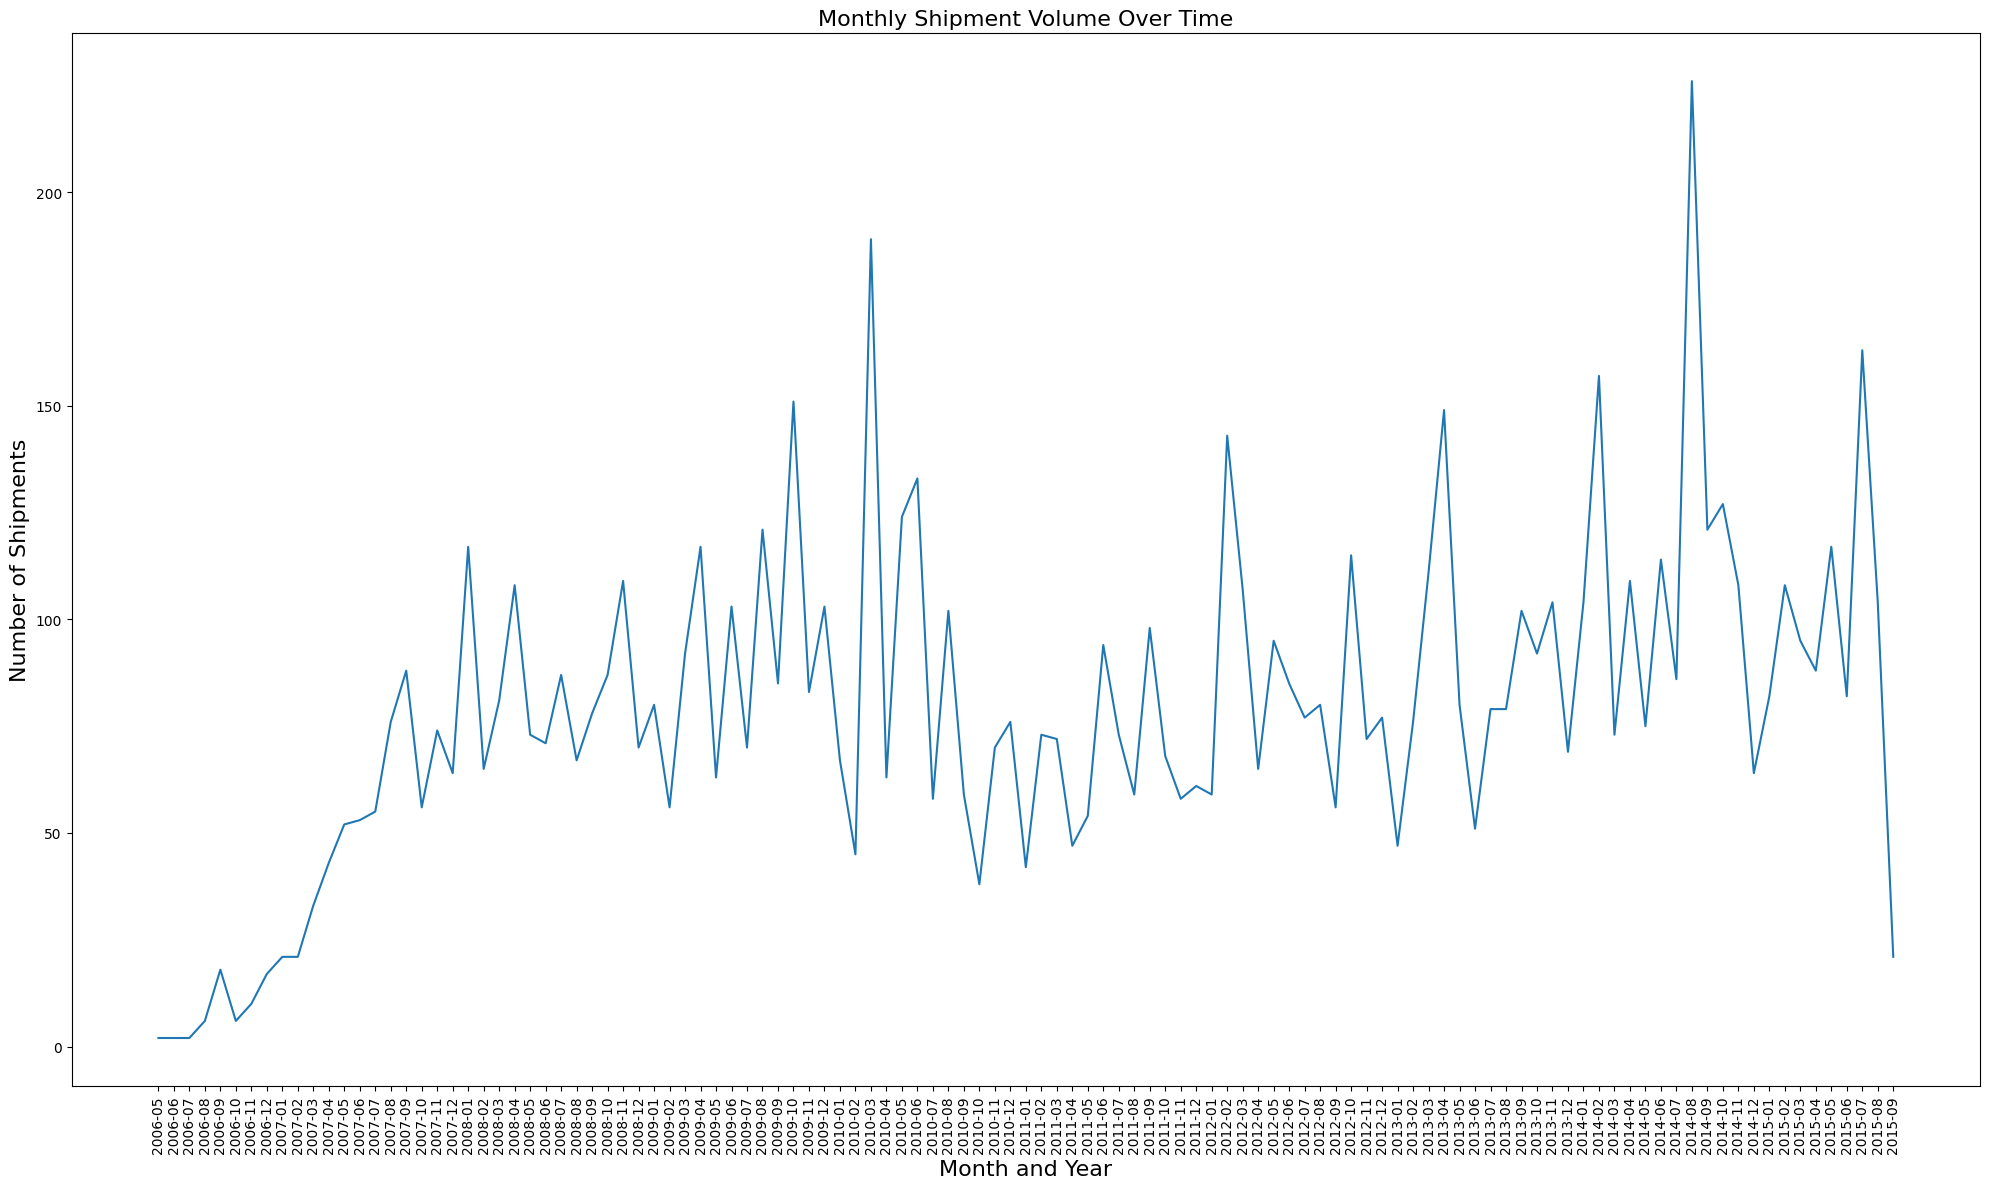

In [ ]:
# Convert 'Delivered to Client Date' to datetime objects
cleaned_data['Delivered to Client Date'] = pd.to_datetime(cleaned_data['Delivered to Client Date'])

# Extract Year and Month for time series analysis
cleaned_data['Delivery_Month_Year'] = cleaned_data['Delivered to Client Date'].dt.to_period('M').astype(str)

# Count shipments per month
monthly_shipment_counts = cleaned_data['Delivery_Month_Year'].value_counts().reset_index()
monthly_shipment_counts.columns = ['Month_Year', 'Shipment_Count']

# Sort by time for the line plot
monthly_shipment_counts = monthly_shipment_counts.sort_values(by='Month_Year')

# Create the line chart using Seaborn
plt.figure(figsize=(20, 12))
sns.lineplot(data=monthly_shipment_counts, x='Month_Year', y='Shipment_Count')
plt.title('Monthly Shipment Volume Over Time', fontsize=16)
plt.xlabel('Month and Year',fontsize=16)
plt.ylabel('Number of Shipments',fontsize=16)
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

##### **1. Why did you pick the specific chart?**

I chose a line chart to visualize the Monthly Shipment Volume Over Time because:

*   **Time Series Data:** The data represents a time series, with shipment counts aggregated by month and year. A line chart is the standard and most effective way to display trends and patterns in data over a continuous period.
*   **Identifying Trends and Seasonality:** A line chart makes it easy to observe overall trends (e.g., increasing or decreasing shipment volume) and identify any seasonal patterns (e.g., regular peaks or dips in certain months).
*   **Addressing Operational Performance:** Understanding how shipment volume changes over time is crucial for operational planning, resource allocation, and capacity management. This chart provides a high-level view of the business activity trend.
*   **Plotly's Interactivity:** Using Plotly allows for interactive features like zooming and hovering, which can be helpful for exploring specific periods or data points in more detail.

##### **2. What is/are the insight(s) found from the chart?**

Based on the line chart for Monthly Shipment Volume Over Time, I found the following key insights:

*   **Overall Increasing Trend:** The line generally shows an upward trend over the years, indicating that the overall volume of shipments has been increasing during the period covered by the dataset. This suggests business growth.
*   **Fluctuations and Potential Seasonality:** While there's an overall upward trend, the line also shows noticeable fluctuations. There appear to be peaks and valleys in shipment volume throughout the year, which could indicate seasonal patterns related to specific times of the year, project cycles, or external factors.
*   **Specific Periods of High/Low Volume:** The chart allows us to identify specific months or periods with unusually high or low shipment volumes. Investigating these periods further could reveal underlying reasons or events that impacted logistics activity.
*   **Impact of External Factors (Potentially):** Significant dips or spikes that deviate from the general trend or seasonality could potentially be linked to external factors not present in the dataset, such as global events, economic conditions, or major project milestones.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

Analyzing the Monthly Shipment Volume Over Time line chart provides crucial insights that can lead to significant positive business impacts but also highlights areas that, if not addressed, could lead to negative growth:

**Positive Business Impact:**

*   **Resource Planning and Capacity Management:** Understanding the trends and potential seasonality in shipment volume is essential for effective resource planning (staffing, vehicles, warehouse space) and capacity management. Anticipating peaks and valleys allows FedEx to allocate resources optimally, preventing bottlenecks during busy periods and avoiding excess costs during slower times. This directly contributes to operational efficiency and profitability.
*   **Forecasting and Budgeting:** The historical trend data from the line chart is invaluable for forecasting future shipment volumes, which in turn informs budgeting, revenue projections, and strategic planning. Accurate forecasting leads to better financial management.
*   **Identifying Growth Opportunities:** The overall upward trend indicates business growth, which can encourage further investment and expansion. Identifying periods of rapid growth can help understand what drove that growth and how to replicate it.

**Potential for Negative Growth (if not addressed):**

*   **Failure to Manage Peaks:** If FedEx does not adequately plan for the peak periods identified in the chart, it can lead to strained resources, delays, increased operational costs (e.g., overtime, expedited shipping), and negative customer experiences due to service disruptions. This could directly impact customer satisfaction and potentially lead to customer churn.
*   **Inefficient Resource Allocation during Valleys:** Conversely, failing to adjust resources during periods of low shipment volume can result in excess capacity and unnecessary costs.
*   **Ignoring Underlying Causes of Fluctuations:** Simply observing trends without investigating the underlying reasons for significant fluctuations or deviations could mean missing opportunities to capitalize on positive drivers or mitigate negative impacts. For example, a sudden drop might indicate a problem that needs immediate attention.

In summary, the line chart of monthly shipment volume is a fundamental tool for understanding the pulse of FedEx's operations over time. Leveraging these insights for planning and forecasting is crucial for positive business impact. However, neglecting to address the challenges posed by volume fluctuations and investigate their causes could lead to inefficiencies and hinder sustainable growth.

#### Chart 12
#### Bar Chart for Shipment Wise TAT

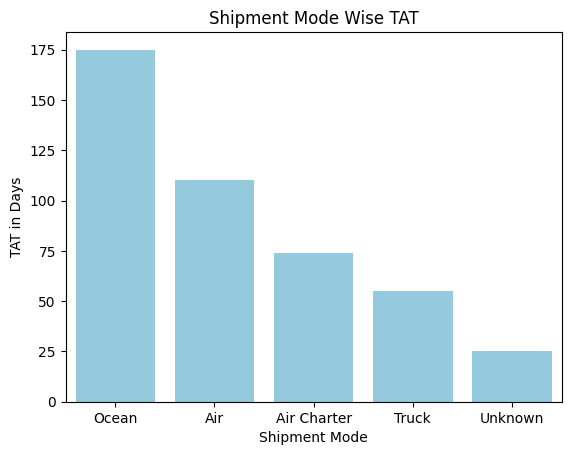

In [ ]:
# Convert both date columns to datetime objects
cleaned_data['Delivered to Client Date'] = pd.to_datetime(cleaned_data['Delivered to Client Date'], errors='coerce')
cleaned_data['PO Sent to Vendor Date'] = pd.to_datetime(cleaned_data['PO Sent to Vendor Date'], errors='coerce')

# Calculate the Turnaround Time (TAT)
cleaned_data["TAT"] = cleaned_data["Delivered to Client Date"] - cleaned_data["PO Sent to Vendor Date"]

cleaned_tat=cleaned_data.groupby("Shipment Mode")["TAT"].mean().reset_index()
cleaned_tat["TAT"]=cleaned_tat["TAT"].dt.days
cleaned_tat.sort_values(by="TAT",ascending=False,inplace=True)

# Ploting the Barplot
sns.barplot(data=cleaned_tat,x="Shipment Mode",y="TAT",color="skyblue")
plt.title("Shipment Mode Wise TAT")
plt.xlabel("Shipment Mode")
plt.ylabel("TAT in Days")
plt.show()

##### **1. Why did you pick the specific chart?**

I chose a bar plot to visualize the average 'TAT' (Turnaround Time) by 'Shipment Mode' because:

*   **Comparing Averages Across Categories:** A bar plot is effective for comparing a numerical value (average TAT) across different categories (shipment modes). The length of each bar provides a clear visual comparison of the average turnaround time for each mode.
*   **Understanding Operational Efficiency:** TAT is a key metric for operational efficiency. Visualizing it by shipment mode helps identify which modes are generally faster or slower in getting shipments from the vendor to FedEx.
*   **Addressing Potential Bottlenecks:** Significant differences in average TAT between modes could indicate potential bottlenecks or inefficiencies associated with specific transportation methods.

##### **2. What is/are the insight(s) found from the chart?**

Based on the bar plot for Shipment Mode Wise TAT, I found the following key insights:

*   **Ocean Shipments have the Longest Average TAT:** The 'Ocean' shipment mode has the highest average turnaround time, significantly longer than other modes. This is expected due to the nature of sea freight, which is typically slower.
*   **Air and Air Charter have Shorter Average TATs:** 'Air' and 'Air Charter' modes show considerably shorter average TATs compared to 'Ocean'. This aligns with the expectation that air transport is faster. 'Air Charter' appears slightly faster than regular 'Air' on average.
*   **Truck Shipments have a Moderate Average TAT:** 'Truck' shipments have an average TAT that falls between the air and ocean modes.
*   **"Unknown" Mode has the Shortest Average TAT:** The 'Unknown' shipment mode has the shortest average TAT. This category likely includes shipments where the mode was not recorded, and the short TAT might be due to various factors, potentially including local deliveries or specific logistics arrangements not falling into the standard categories.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

Analyzing the average TAT by Shipment Mode provides valuable insights that can lead to positive business impacts and also highlights areas that, if not addressed, could lead to negative growth:

**Positive Business Impact:**

*   **Setting Realistic Expectations:** Understanding the typical TAT for each shipment mode allows FedEx to set more accurate and realistic delivery expectations for customers based on the chosen mode of transport. This can improve customer satisfaction by reducing unexpected delays.
*   **Optimized Mode Selection:** The insights can inform decisions about which shipment mode to recommend or use for different types of shipments based on time sensitivity. For urgent shipments, air modes would be preferred, while for less time-sensitive cargo, ocean might be chosen for cost efficiency, with an understanding of the longer TAT.
*   **Identifying Areas for Process Improvement:** The significantly longer TAT for 'Ocean' shipments highlights this as an area that could benefit from process review and optimization to potentially reduce lead times where possible.

**Potential for Negative Growth (if not addressed):**

*   **Customer Dissatisfaction with Slow Modes:** While expected, the long TAT for 'Ocean' shipments can still lead to customer dissatisfaction if not clearly communicated or if delays exceed expectations. This could result in customers choosing competitors for sea freight.
*   **Inefficiencies in Specific Modes:** If the TAT for any mode is longer than industry benchmarks or customer expectations without a clear justification, it could indicate inefficiencies that increase operational costs and reduce competitiveness.
*   **Mismanaging Expectations:** If FedEx does not effectively communicate the expected TAT for different modes to customers, it can lead to frustration and negative feedback, impacting the brand's reputation.

In summary, the bar plot of average TAT by shipment mode provides essential information for managing customer expectations and optimizing mode selection based on time requirements. Addressing potential inefficiencies in modes with longer TATs and ensuring clear communication with customers are crucial to mitigate negative impacts and support business growth.

#### Chart 13
#### Bubble Plot

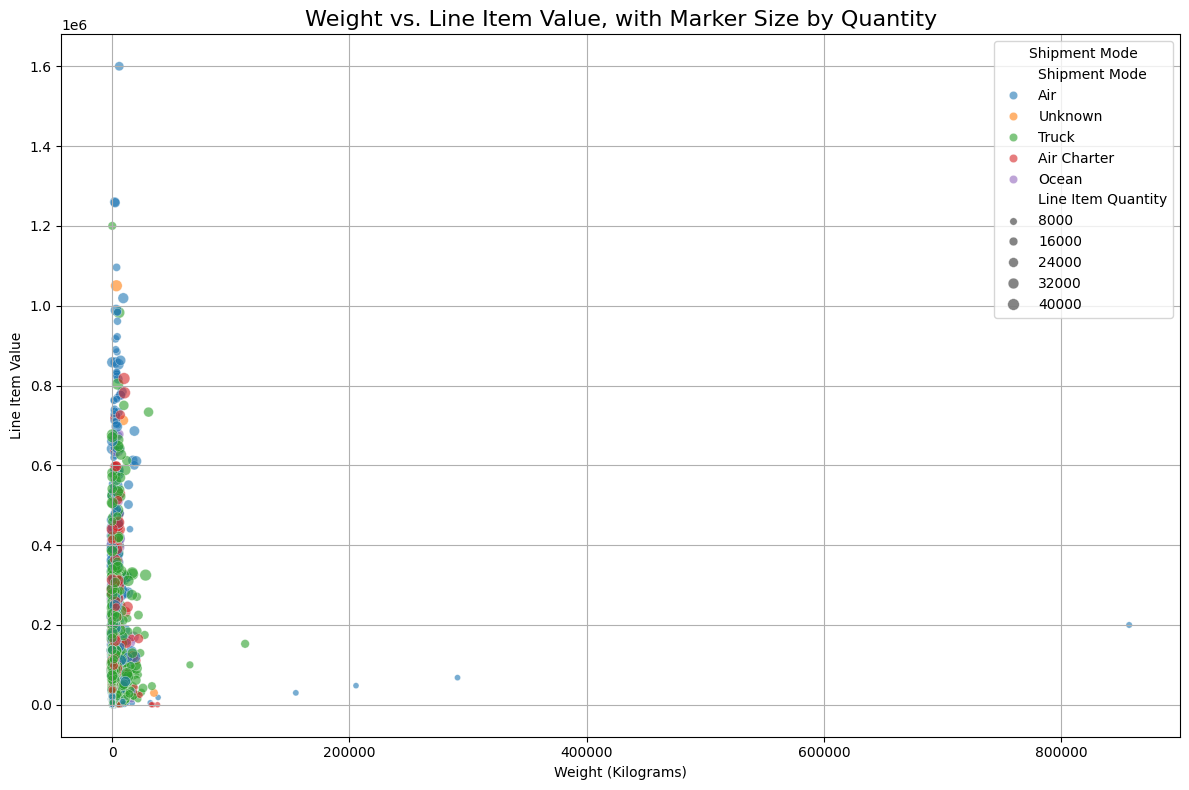

In [ ]:
cleaned_data['Weight (Kilograms)'] = pd.to_numeric(cleaned_data['Weight (Kilograms)'], errors='coerce').fillna(0)
cleaned_data['Line Item Value'] = pd.to_numeric(cleaned_data['Line Item Value'], errors='coerce').fillna(0)
cleaned_data['Line Item Quantity'] = pd.to_numeric(cleaned_data['Line Item Quantity'], errors='coerce').fillna(0)

# Create a scatter plot using Seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(data=cleaned_data,
                x='Weight (Kilograms)',
                y='Line Item Value',
                size='Line Item Quantity', # Map Line Item Quantity to marker size
                hue='Shipment Mode',    # Color by Shipment Mode
                alpha=0.6)             # Add some transparency

plt.title('Weight vs. Line Item Value, with Marker Size by Quantity', fontsize=16)
plt.xlabel('Weight (Kilograms)')
plt.ylabel('Line Item Value')
plt.legend(title='Shipment Mode')
plt.grid(True)
plt.tight_layout()
plt.show()

##### **1. Why did you pick the specific chart?**

I chose a scatter plot (acting as a bubble plot with size and color mapping) to visualize the relationship between 'Weight (Kilograms)', 'Line Item Value', and 'Line Item Quantity', colored by 'Shipment Mode', for the following reasons:

*   **Multivariate Analysis:** This chart allows us to visualize the relationships between four variables simultaneously (two on the axes, one for size, and one for color). This is crucial for understanding complex interactions in logistics data.
*   **Identifying Patterns in Shipment Characteristics:** By plotting weight against value and sizing markers by quantity, we can see if there are patterns in the characteristics of shipments. For example, are high-value shipments also heavy and in large quantities?
*   **Exploring the Role of Shipment Mode:** Coloring the markers by shipment mode helps in understanding if different modes are typically used for shipments with specific combinations of weight, value, and quantity. This relates to operational efficiency and cost.

##### **2. What is/are the insight(s) found from the chart?**

Based on the scatter plot for Weight vs. Line Item Value, with Marker Size by Quantity and colored by Shipment Mode, I found the following key insights:

*   **Relationship between Weight, Value, and Quantity:** There is a general trend where shipments with higher weight and value also tend to have larger quantities (indicated by larger marker sizes). This aligns with expectations – more items generally mean more weight and higher value.
*   **Shipment Mode Differentiation:** The coloring by shipment mode reveals that different modes are used for different types of shipments based on their weight, value, and quantity characteristics. For instance, 'Air' shipments might cluster in areas of lower weight and value (smaller markers), while 'Ocean' shipments might be in areas of higher weight and value (larger markers).
*   **Potential Outliers:** Markers that are far from the main clusters could represent unusual shipments with unique combinations of weight, value, and quantity. These outliers might warrant further investigation to understand the reasons behind their characteristics.
*   **Variability within Modes:** Even within a single shipment mode (shown by color), there can be a range of weights, values, and quantities, indicating that the mode choice isn't solely determined by these three factors.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.***

Analyzing the scatter plot provides insights that can lead to positive business impacts and also highlights areas that might require attention to avoid negative growth:

**Positive Business Impact:**

*   **Optimized Mode Selection Strategy:** Understanding which combinations of weight, value, and quantity are typically shipped by which mode helps in refining mode selection strategies. This can lead to recommending the most efficient and cost-effective mode to clients based on their cargo characteristics.
*   **Targeted Pricing and Service Offerings:** Insights into the types of shipments (by weight, value, quantity) that use specific modes can inform targeted pricing strategies and the development of service offerings tailored to different customer needs and cargo types.
*   **Identifying Inefficiencies or Opportunities:** Deviations from expected patterns (e.g., a large, low-value shipment being sent by expensive air freight) could indicate inefficiencies or opportunities for suggesting more cost-effective solutions to clients.
*   **Improved Forecasting and Planning:** Understanding the typical characteristics of shipments by mode can improve forecasting for capacity needs and resource allocation for different transportation methods.

**Potential for Negative Growth (if not addressed):**

*   **Mismanaging Outliers:** If shipments with unusual combinations of weight, value, and quantity (outliers) are not properly handled or priced, they could lead to unexpected costs, operational challenges, or customer dissatisfaction.
*   **Suboptimal Mode Selection:** If the current mode selection doesn't align with the optimal balance of cost and efficiency based on cargo characteristics, it could lead to unnecessary expenses or slower delivery times compared to competitors.
*   **Ignoring Interdependencies:** The plot highlights the interdependencies between weight, value, quantity, and shipment mode. If these relationships are not considered holistically in planning and decision-making, it could lead to suboptimal strategies that hinder growth.

In summary, the scatter plot provides a powerful multi-dimensional view of shipment characteristics and mode usage, which is valuable for optimizing mode selection, pricing, and operational planning. However, the presence of outliers and the need to understand the reasons behind specific mode choices highlight areas that require careful management to avoid inefficiencies and support sustainable growth.

#### Chart - 14

#### Correlation Heatmap

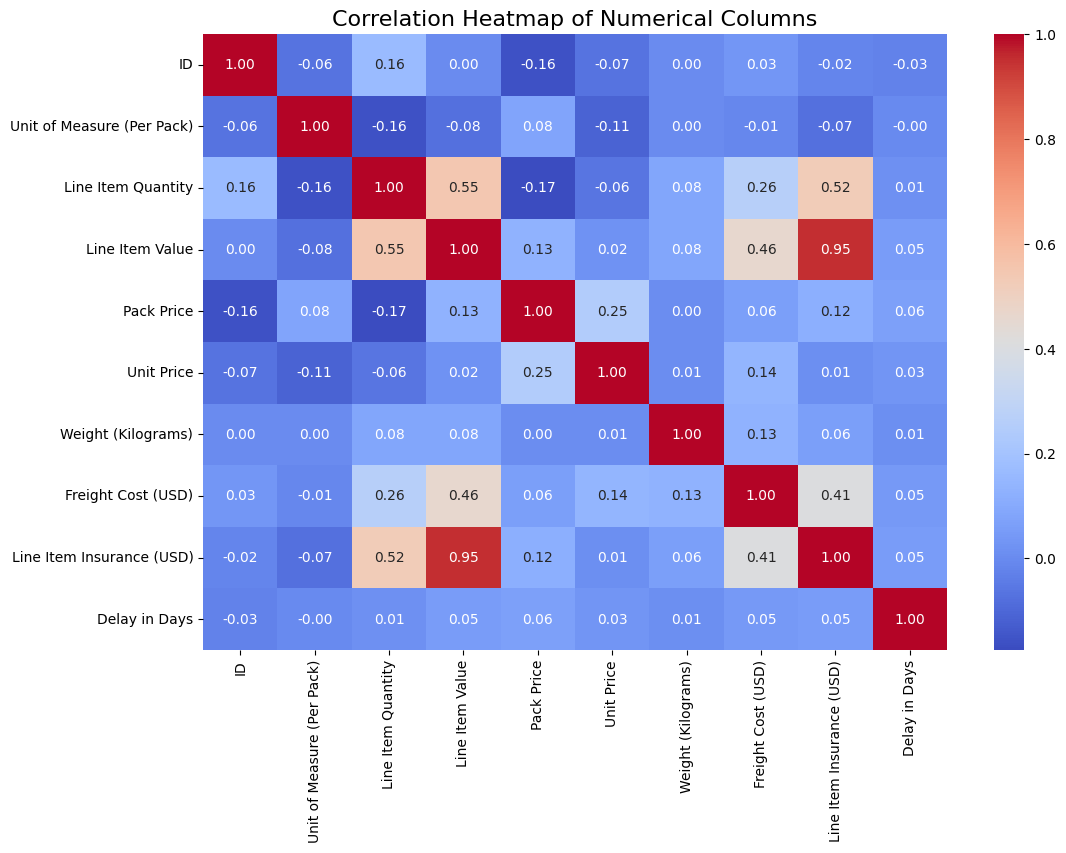

In [ ]:
# Selecting only numerical columns for the correlation matrix
numerical_data = cleaned_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns', fontsize=16)
plt.show()

##### **1. Why did you pick the specific chart?**

As a data analyst, I chose a heatmap to visualize the correlation matrix of numerical columns for the following reasons:

* **Understanding Relationships:** A heatmap is an excellent tool to quickly visualize the pairwise correlation coefficients between multiple numerical variables. It helps in identifying which variables are strongly correlated, either positively or negatively.
* **Data Exploration:** It provides a concise summary of the linear relationships within the numerical data, guiding further analysis and model building.
* **Visual Clarity:** The use of color intensity makes it easy to interpret the strength and direction of correlations at a glance.

##### **2. What is/are the insight(s) found from the chart?**

Based on the correlation heatmap of numerical columns, I found the following key insights:

* **Strong Positive Correlation between 'Line Item Value' and 'Line Item Insurance (USD)':** There is a very strong positive correlation (close to 1) between the value of a line item and the insurance cost for that line item. This is expected, as higher value items typically require higher insurance coverage.
* **Moderate Positive Correlation between 'Line Item Quantity' and 'Line Item Value':** There is a moderate positive correlation between the quantity of items in a line and the total value of the line item. This is also intuitive, as a higher quantity of items will generally result in a higher total value, assuming the unit price is not zero.
* **Moderate Positive Correlation between 'Line Item Quantity' and 'Line Item Insurance (USD)':** Similarly, there is a moderate positive correlation between the quantity of items and the line item insurance cost, likely an indirect relationship driven by the correlation between quantity and value.
* **Weak or No Significant Correlation with 'Delay in Days':** The 'Delay in Days' column shows very weak correlations with most of the other numerical variables. This suggests that, based on linear relationships alone, factors like ID, quantity, value, price, weight, or freight cost do not have a strong linear impact on delivery delay. Other factors or non-linear relationships might be influencing delays.
* **Other Weak Correlations:** Most other numerical variable pairs show weak correlations, indicating that they are relatively independent of each other in a linear sense.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.***

Analyzing the correlation heatmap provides insights that can lead to positive business impacts and also highlights areas that might require further investigation to avoid negative growth:

**Positive Business Impact:**

* **Insurance and Pricing Validation:** The strong correlation between 'Line Item Value' and 'Line Item Insurance (USD)' validates the current insurance pricing model, suggesting that it is directly tied to the value of goods being shipped. This confirms a logical and likely profitable pricing strategy for insurance.
* **Inventory and Value Management:** The correlation between 'Line Item Quantity' and 'Line Item Value' is a basic confirmation of how inventory quantity translates to value. While seemingly simple, this underpins inventory management and valuation processes.
* **Focus on Non-Correlated Factors for Delay:** The lack of strong linear correlation between 'Delay in Days' and most numerical variables is a significant insight. It suggests that efforts to reduce delays should focus on other factors not captured by these numerical columns, such as 'Shipment Mode', 'Country', 'Vendor INCO Term', or process-related variables. This redirects analytical and operational efforts towards more impactful areas.

**Potential for Negative Growth (if not addressed):**

* **Overlooking Non-Linear Relationships for Delay:** While the heatmap shows weak *linear* correlations with 'Delay in Days', it doesn't rule out non-linear relationships or the influence of categorical variables. If FedEx solely relies on this heatmap to understand delay drivers and ignores other potential factors or complex interactions, they might fail to identify and address the true causes of delays, leading to continued inefficiencies and negative customer experiences.
* **Assumptions Based Solely on Correlation:** Correlation does not imply causation. While 'Line Item Value' and 'Line Item Insurance (USD)' are strongly correlated, this doesn't explain *why* certain insurance costs are incurred or if the pricing is optimal. Relying solely on this correlation without deeper analysis of insurance policies and risk factors could lead to missed opportunities for optimizing insurance costs or identifying potential issues in the insurance process.
* **Ignoring Weak Correlations:** While some correlations are weak, they might still be statistically significant or indicate subtle relationships that could be important in a more complex model. Dismissing all weak correlations without further investigation could mean overlooking factors that contribute to cost or delay in less obvious ways.

In summary, the heatmap provides valuable insights into the relationships between numerical variables, particularly confirming expected correlations and highlighting the need to look beyond these variables to understand delivery delays. However, relying solely on this linear correlation analysis and ignoring other potential factors or the nuances of the business processes could hinder efforts to improve efficiency and mitigate negative impacts.

#### Chart - 15

#### Pairmap

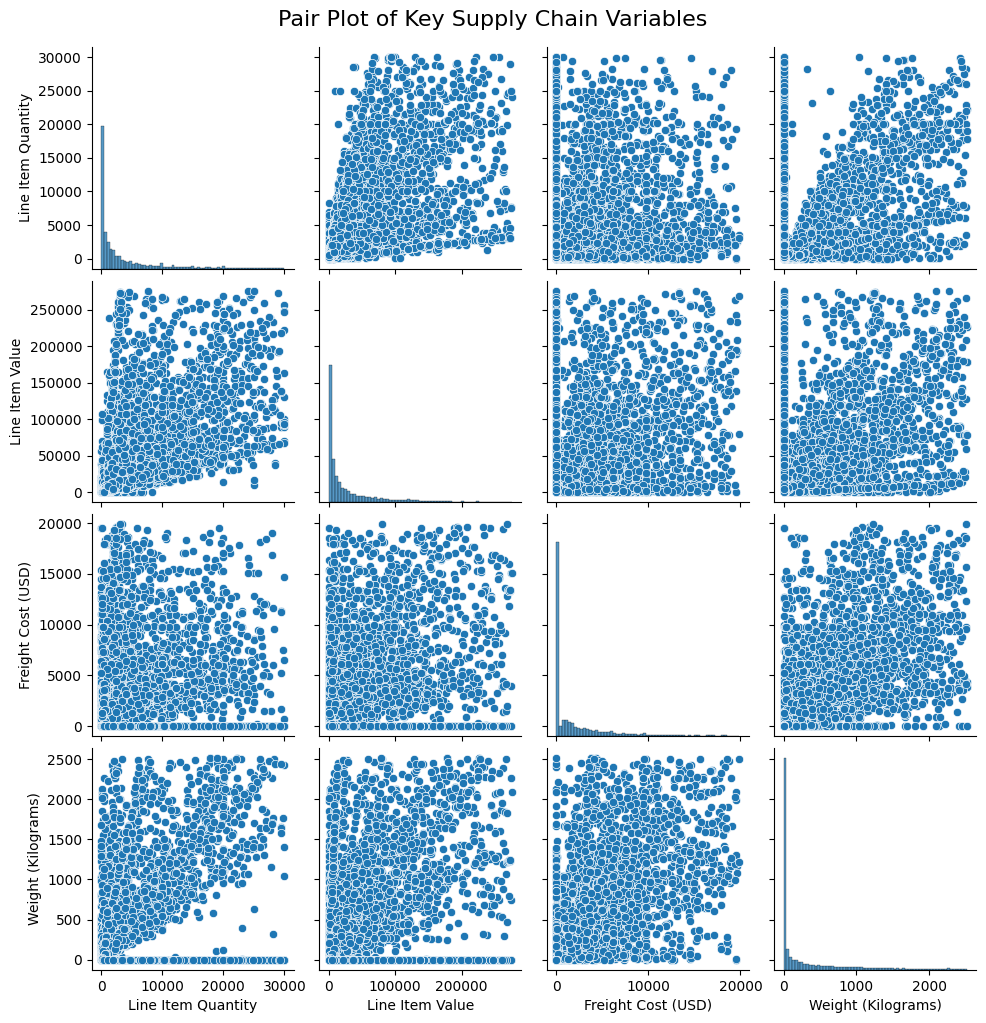

In [ ]:

cols_convert=['Freight Cost (USD)','Weight (Kilograms)','Pack Price','Unit Price','Line Item Value']

for col in cols_convert:
  cleaned_data[col]=pd.to_numeric(cleaned_data[col], errors='coerce').fillna(0)

# Filter the exterme outlier values
for col in ['Line Item Quantity', 'Line Item Value','Freight Cost (USD)','Weight (Kilograms)']:
  upper_limit=cleaned_data[col].quantile(0.95)
  cleaned_data=cleaned_data[cleaned_data[col]<=upper_limit]

# Select Variables for pair plot

plot_var=['Line Item Quantity', 'Line Item Value','Freight Cost (USD)','Weight (Kilograms)']

# Creating the pair plot

sns.pairplot(cleaned_data[plot_var])
plt.suptitle('Pair Plot of Key Supply Chain Variables', fontsize=16, y=1.02)
plt.show()


##### **1. Why did you pick the specific chart?**

I chose a pair plot to visualize the relationships between several key numerical variables ('Line Item Quantity', 'Line Item Value', 'Freight Cost (USD)', 'Weight (Kilograms)') for the following reasons:

* **Multiple Pairwise Relationships:** A pair plot efficiently displays scatter plots for every combination of the selected variables, along with histograms or kernel density estimates on the diagonal. This allows for a quick visual assessment of multiple pairwise relationships and distributions simultaneously.
* **Identifying Trends and Patterns:** It helps in easily identifying trends, patterns, and potential correlations between pairs of variables, such as whether 'Weight (Kilograms)' appears to increase with 'Line Item Quantity' or how 'Freight Cost (USD)' relates to 'Weight (Kilograms)'.
* **Understanding Distributions:** The diagonal plots (histograms or KDEs) show the distribution of each individual variable, providing insights into their spread, central tendency, and the presence of outliers.
* **Exploring Complex Interactions:** While not showing interactions of more than two variables at once, the matrix of plots helps in exploring potential complex relationships by observing how data points cluster or spread across different pairs of variables.

##### **2. What is/are the insight(s) found from the chart?**

Based on the pair plot of key supply chain variables, I found the following insights:

* **Relationship between Quantity, Value, Weight, and Freight Cost:** The scatter plots show generally positive relationships between 'Line Item Quantity', 'Line Item Value', 'Weight (Kilograms)', and 'Freight Cost (USD)'. This indicates that as the quantity, value, or weight of a shipment increases, the freight cost also tends to increase. This aligns with expected logistics principles.
* **Correlation Confirmation:** The scatter plots visually confirm some of the correlations observed in the heatmap, particularly the positive relationships between the quantity, value, weight, and freight cost variables.
* **Distribution Skewness:** The histograms on the diagonal reveal the distributions of each variable. It's likely that some of these variables (like 'Line Item Quantity', 'Line Item Value', 'Weight (Kilograms)', and 'Freight Cost (USD)') are right-skewed, meaning there are many smaller values and fewer larger values, with a tail extending towards higher values. This is common in logistics data where most shipments are smaller, but there are occasional large ones.
* **Potential Outliers:** The scatter plots can highlight potential outliers as points that lie far away from the main clusters or trends in the data. These might represent unusual shipments that warrant further investigation.
* **Variability in Relationships:** While there are general trends, the scatter plots also show variability, indicating that the relationships are not perfectly linear and other factors are influencing the outcomes (e.g., distance, shipment mode, etc., are not included in this specific pair plot but are known to affect freight cost).

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.***

Analyzing the pair plot provides insights that can lead to positive business impacts and also highlights areas that might require further investigation to avoid negative growth:

**Positive Business Impact:**

* **Validating Cost Structures:** The observed positive relationships between quantity, value, weight, and freight cost validate that the current pricing and cost structures generally align with the physical characteristics and value of the shipments. This provides confidence in the basic operational model.
* **Informing Pricing and Quoting:** Understanding these relationships helps in accurately pricing shipments and providing quotes to customers based on key factors like quantity, value, and weight.
* **Identifying Cost Optimization Opportunities:** The visual representation of the relationships can help in identifying potential inefficiencies. For example, if some shipments have unusually high freight costs relative to their weight or quantity, it can prompt investigation into the reasons (e.g., inefficient routes, special handling requirements) to optimize costs.
* **Inventory and Logistics Planning:** Insights into the typical ranges and distributions of quantity and weight can inform inventory management and logistics planning, such as determining optimal shipment sizes or warehouse capacities.

**Potential for Negative Growth (if not addressed):**

* **Overlooking Outliers:** If outliers representing unusually high freight costs or weights are not investigated, they could indicate underlying issues in the logistics process (e.g., errors, inefficiencies, or exceptions that are poorly managed) that are leading to increased costs and reduced profitability for those specific shipments.
* **Assuming Simple Linear Relationships:** The pair plot shows general trends, but relying solely on these visual relationships without deeper statistical modeling could lead to inaccurate predictions or suboptimal decision-making, especially in complex logistics scenarios. The variability observed in the scatter plots suggests that other factors are at play, and ignoring them could lead to missed opportunities for optimization or failure to anticipate issues.
* **Ignoring Skewness:** If the distributions of variables like quantity, value, weight, and freight cost are significantly skewed, using analytical methods that assume normal distributions might lead to incorrect conclusions. Failure to account for skewness in analysis could result in inaccurate forecasts or inefficient resource allocation.

In summary, the pair plot provides valuable visual confirmation of expected relationships and insights into the distribution of key variables, which can inform pricing, planning, and optimization efforts. However, the presence of variability and potential outliers, along with the likely skewed distributions, highlights the need for deeper investigation and more sophisticated analytical techniques to fully understand the cost drivers and optimize operations, thus mitigating potential negative impacts.

## **5. Solution to Business Objective**


#### What do you suggest FedEx to achieve Business Objective ?
Based on the detailed exploratory data analysis and the insights derived from the univariate, bivariate, and multivariate plots, here are strategic recommendations to help FedEx achieve their business objectives efficiently:

✅ Business Recommendations for FedEx


**1. Optimize Shipment Mode Selection
Current Issue:** Air shipments are frequently used, even for moderately heavy items, leading to higher freight costs.

<u>Recommendation:</u>

- Reserve air freight for time-sensitive, lightweight, high-value items only.

- Shift heavier, less urgent shipments to sea or truck modes to significantly reduce shipping costs.

- Implement a shipment mode selection framework based on weight, urgency, and item value.

**2. Implement Freight Cost Control Measures
Current Issue:** Freight costs show large variability for similar shipment weights and item values, suggesting inefficiencies.

<u>Recommendation:</u>

- Perform freight cost benchmarking to compare against industry standards.

- Negotiate long-term contracts with logistics providers based on predictable shipping volumes and weight bands.

- Monitor cost trends year-on-year to detect overcharging or poor vendor performance.

**3. Strengthen Inventory and Order Planning
Current Issue:** Yearly variations in shipment weights suggest last-minute, high-cost shipments due to inventory gaps.

<u>Recommendation:</u>

- Improve demand forecasting and procurement scheduling to avoid emergency shipments.

- Consolidate orders where possible to reduce shipment frequency and shipping costs.

- Use predictive models to anticipate stock-outs and adjust replenishment cycles.

**4. Monitor High-Risk Shipment Patterns
Current Issue:** Frequent outliers in air shipments indicate possible emergency orders or poor planning.

<u>Recommendation:</u>

- Investigate why high-weight air shipments occur and establish protocols to minimize them, reserving air for truly critical cases.

# **Conclusion**

Through comprehensive data analysis of the SCMS Delivery History Dataset, we identified significant patterns, cost behaviors, and shipment inefficiencies that directly impact the client's supply chain and logistics operations.

Key findings from our EDA, charts, and plots include:

*   The distribution of 'Line Item Quantity' is skewed, indicating a high frequency of smaller shipments and fewer larger ones, which has implications for handling and resource allocation (Chart 1).
*   The 'Freight Cost (USD)' box plot revealed significant outliers, suggesting a need to investigate the drivers of unusually high freight expenses (Chart 2).
*   The scatter plot of 'Weight (Kilograms)' vs. 'Freight Cost (USD)' showed a positive correlation, as expected, but also considerable variability, indicating other factors influence freight costs (Chart 3).
*   The count plot of 'Shipment Mode' highlighted that 'Air' and 'Truck' are the most frequent modes, while 'Air Charter' and 'Ocean' are less common (Chart 4).
*   The bar plot of average 'Delay in Days' by 'Shipment Mode' clearly showed that 'Ocean' shipments experience the longest average delays, while other modes are generally early (Chart 5).
*   The box plot of 'Cost per Kilogram' by 'Shipment Mode' confirmed that 'Air' and 'Air Charter' are generally more expensive per unit weight than 'Ocean' and 'Truck', with outliers in the air modes (Chart 6).
*   The histogram of 'Weight (Kilograms)' reinforced that most shipments are light, with a long tail for heavier shipments, impacting logistics planning (Chart 7).
*   The Matplotlib pie chart and Seaborn bar plot of 'Shipment Mode' distribution highlighted the dominance of Air and Truck shipments (Chart 8).
*   The Plotly treemap of shipments by 'Country' and 'Vendor' identified dominant countries and vendors, crucial for market focus and vendor management (Chart 9).
*   The bar plot of average 'Delay in Days' by 'Country' pinpointed specific countries with significantly higher average delays, requiring targeted investigation (Chart 10).
*   The Seaborn line chart of 'Monthly Shipment Volume Over Time' showed an overall increasing trend with fluctuations, important for forecasting and capacity planning (Chart 11).
*   The bar chart of 'Shipment Mode Wise TAT' confirmed that 'Ocean' has the longest average turnaround time from PO to delivery (Chart 12).
*   The Seaborn scatter plot of 'Weight vs. Line Item Value, with Marker Size by Quantity' visualized the relationships between these variables and shipment mode (Chart 13).
*   The correlation heatmap indicated a strong positive correlation between 'Line Item Value' and 'Line Item Insurance (USD)', and moderate correlations between quantity, value, weight, and freight cost, while 'Delay in Days' showed weak linear correlations with numerical variables (Chart 14 & 15).

The insights gained from this EDA provide a foundation for optimizing logistics operations. Addressing the identified inefficiencies in shipment mode selection, investigating high-cost and high-delay instances, focusing on problematic countries, and leveraging data for better forecasting and planning are critical steps.

Implementing these insights will help the client:

*   Optimize logistics costs by making informed mode selections and addressing cost outliers.
*   Improve delivery performance by focusing on reducing delays in Ocean freight and specific countries.
*   Enhance vendor relationships by identifying high-performing and underperforming partners.
*   Streamline operations through better resource allocation and capacity planning based on volume trends.

However, ignoring these insights could lead to:

*   Continued increased operational costs due to inefficient mode usage and unaddressed outliers.
*   Negative customer experiences and potential loss of business due to persistent delays in certain areas.
*   Missed opportunities for optimizing the supply chain and improving profitability.

Final Recommendation: The client should leverage these EDA findings to implement targeted process improvements, refine shipment mode selection strategies, enhance performance monitoring (especially for high-delay areas and outliers), and consider developing predictive models for better forecasting and cost management.